In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from matplotlib.gridspec import GridSpec
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, roc_curve, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
#from keras.wrappers.scikit_learn import KerasClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_data_upload.csv")

In [ ]:
df

Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
0               No              No     Yes           No             Yes   
1               No             Yes      No           No              No   
2               No              No     Yes           No             Yes   
3              Yes              No     Yes           No             Yes   
4               No             Yes     Yes          Yes             Yes   
..             ...             ...     ...          ...             ...   
515             No              No     Yes           No             Yes   
516             No              No     Yes          Yes             Yes   
517             No             Yes      No           No              No   
518             No             Yes     Yes           No             Yes   
519             No              No      No           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
0                No              Yes      Yes     Yes  Positive  
1               Yes               No      Yes      No  Positive  
2                No              Yes      Yes      No  Positive  
3                No               No       No      No  Positive  
4               Yes              Yes      Yes     Yes  Positive  
..              ...              ...      ...     ...       ...  
515             Yes               No       No      No  Positive  
516             Yes               No       No      No  Positive  
517             Yes              Yes       No     Yes  Positive  
518              No               No      Yes      No  Negative  
519              No               No       No      No  Negative  

[520 rows x 17 columns]

In [ ]:
df.columns = ['Age','Gen','Polyuria','Polydipsia','sudweloss','weakness','Polyphagia','Genthrush','visblurr','Itching','Irritability','delayheal','partparesis','mustiff','Alopecia','Obesity','classs']

In [ ]:
columns = df.columns
col = columns[1:]
col

Index(['Gen', 'Polyuria', 'Polydipsia', 'sudweloss', 'weakness', 'Polyphagia',
       'Genthrush', 'visblurr', 'Itching', 'Irritability', 'delayheal',
       'partparesis', 'mustiff', 'Alopecia', 'Obesity', 'classs'],
      dtype='object')

Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in col:
    df[i] = le.fit_transform(df[i])

df.head()

Age  Gen  Polyuria  Polydipsia  sudweloss  weakness  Polyphagia  Genthrush  \
0   40    1         0           1          0         1           0          0   
1   58    1         0           0          0         1           0          0   
2   41    1         1           0          0         1           1          0   
3   45    1         0           0          1         1           1          1   
4   60    1         1           1          1         1           1          0   

   visblurr  Itching  Irritability  delayheal  partparesis  mustiff  Alopecia  \
0         0        1             0          1            0        1         1   
1         1        0             0          0            1        0         1   
2         0        1             0          1            0        1         1   
3         0        1             0          1            0        0         0   
4         1        1             1          1            1        1         1   

   Obesity  classs  
0        1       1  
1        0       1  
2        0       1  
3        0       1  
4        1       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gen           520 non-null    int64
 2   Polyuria      520 non-null    int64
 3   Polydipsia    520 non-null    int64
 4   sudweloss     520 non-null    int64
 5   weakness      520 non-null    int64
 6   Polyphagia    520 non-null    int64
 7   Genthrush     520 non-null    int64
 8   visblurr      520 non-null    int64
 9   Itching       520 non-null    int64
 10  Irritability  520 non-null    int64
 11  delayheal     520 non-null    int64
 12  partparesis   520 non-null    int64
 13  mustiff       520 non-null    int64
 14  Alopecia      520 non-null    int64
 15  Obesity       520 non-null    int64
 16  classs        520 non-null    int64
dtypes: int64(17)
memory usage: 69.2 KB


In [ ]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              Age         Gen    Polyuria  Polydipsia   sudweloss    weakness  \
count  520.000000  520.000000  520.000000  520.000000  520.000000  520.000000   
mean    48.028846    0.630769    0.496154    0.448077    0.417308    0.586538   
std     12.151466    0.483061    0.500467    0.497776    0.493589    0.492928   
min     16.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     39.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     47.500000    1.000000    0.000000    0.000000    0.000000    1.000000   
75%     57.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max     90.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
var    147.658126    0.233348    0.250467    0.247780    0.243631    0.242978   
skew     0.329359   -0.543509    0.015430    0.209426    0.336359   -0.352476   
kurt    -0.191709   -1.711194   -2.007498   -1.963708   -1.894163   -1.883018   

       Polyphagia   Genthru

In [ ]:
df.isnull().sum()

Age             0
Gen             0
Polyuria        0
Polydipsia      0
sudweloss       0
weakness        0
Polyphagia      0
Genthrush       0
visblurr        0
Itching         0
Irritability    0
delayheal       0
partparesis     0
mustiff         0
Alopecia        0
Obesity         0
classs          0
dtype: int64

In [ ]:
df.head()

Age  Gen  Polyuria  Polydipsia  sudweloss  weakness  Polyphagia  Genthrush  \
0   40    1         0           1          0         1           0          0   
1   58    1         0           0          0         1           0          0   
2   41    1         1           0          0         1           1          0   
3   45    1         0           0          1         1           1          1   
4   60    1         1           1          1         1           1          0   

   visblurr  Itching  Irritability  delayheal  partparesis  mustiff  Alopecia  \
0         0        1             0          1            0        1         1   
1         1        0             0          0            1        0         1   
2         0        1             0          1            0        1         1   
3         0        1             0          1            0        0         0   
4         1        1             1          1            1        1         1   

   Obesity  classs  
0        1       1  
1        0       1  
2        0       1  
3        0       1  
4        1       1

In [ ]:
df.shape

(520, 17)

In [ ]:
df.isnull().sum()

Age             0
Gen             0
Polyuria        0
Polydipsia      0
sudweloss       0
weakness        0
Polyphagia      0
Genthrush       0
visblurr        0
Itching         0
Irritability    0
delayheal       0
partparesis     0
mustiff         0
Alopecia        0
Obesity         0
classs          0
dtype: int64

In [ ]:
df.describe()

Age         Gen    Polyuria  Polydipsia   sudweloss    weakness  \
count  520.000000  520.000000  520.000000  520.000000  520.000000  520.000000   
mean    48.028846    0.630769    0.496154    0.448077    0.417308    0.586538   
std     12.151466    0.483061    0.500467    0.497776    0.493589    0.492928   
min     16.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     39.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     47.500000    1.000000    0.000000    0.000000    0.000000    1.000000   
75%     57.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max     90.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Polyphagia   Genthrush    visblurr     Itching  Irritability  \
count  520.000000  520.000000  520.000000  520.000000    520.000000   
mean     0.455769    0.223077    0.448077    0.486538      0.242308   
std      0.498519    0.416710    0.497776    0.500300      0.428892   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      0.000000    0.000000    0.000000    0.000000      0.000000   
50%      0.000000    0.000000    0.000000    0.000000      0.000000   
75%      1.000000    0.000000    1.000000    1.000000      0.000000   
max      1.000000    1.000000    1.000000    1.000000      1.000000   

        delayheal  partparesis     mustiff    Alopecia     Obesity      classs  
count  520.000000   520.000000  520.000000  520.000000  520.000000  520.000000  
mean     0.459615     0.430769    0.375000    0.344231    0.169231    0.615385  
std      0.498846     0.495661    0.484589    0.475574    0.375317    0.486973  
min      0.000000     0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000     0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000     0.000000    0.000000    0.000000    0.000000    1.000000  
75%      1.000000     1.000000    1.000000    1.000000    0.000000    1.000000  
max      1.000000     1.000000    1.000000    1.000000    1.000000    1.000000

In [ ]:
df.dtypes

Age             int64
Gen             int64
Polyuria        int64
Polydipsia      int64
sudweloss       int64
weakness        int64
Polyphagia      int64
Genthrush       int64
visblurr        int64
Itching         int64
Irritability    int64
delayheal       int64
partparesis     int64
mustiff         int64
Alopecia        int64
Obesity         int64
classs          int64
dtype: object

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

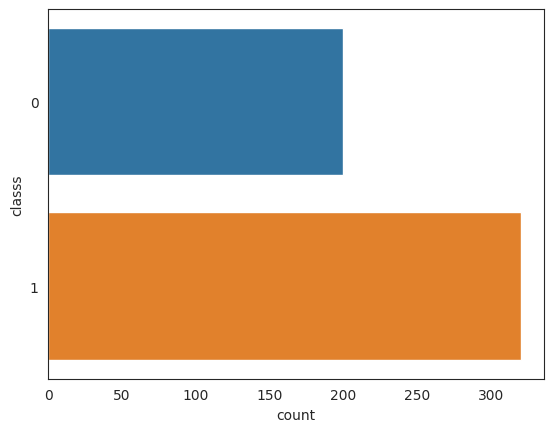

In [ ]:
sns.set_style('white')
sns.countplot(y='classs', data=df)

# Rotate x-labels
plt.xticks()

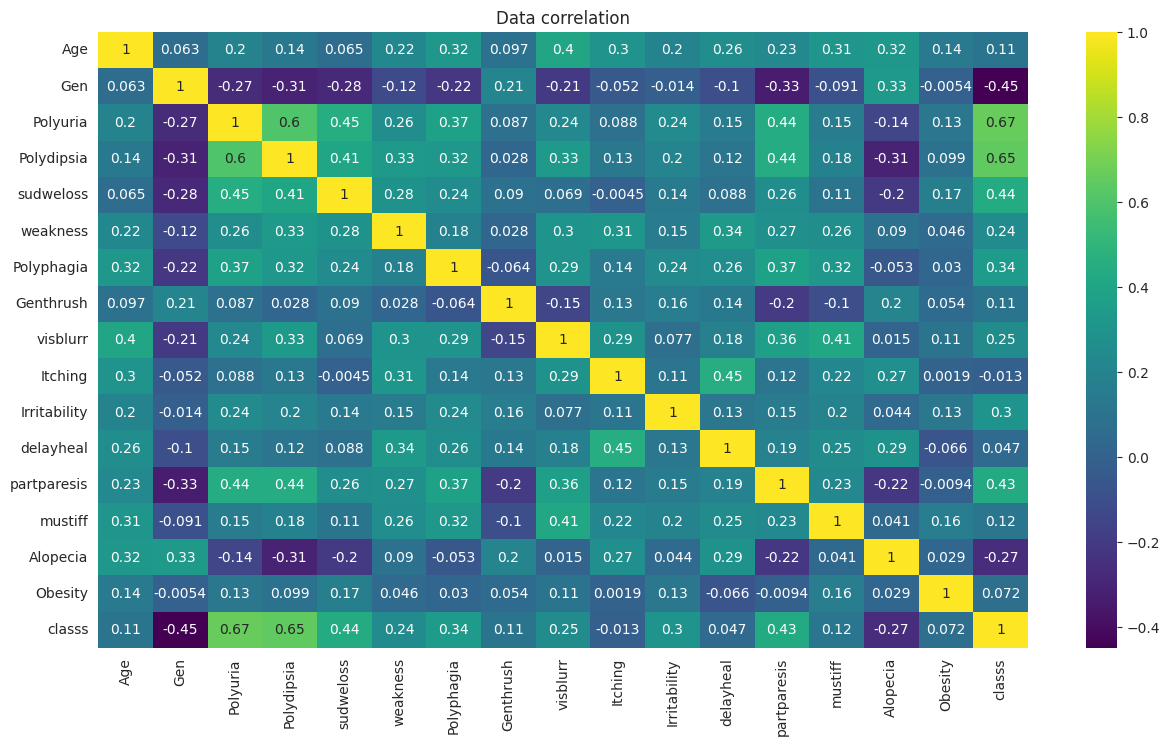

<Figure size 640x480 with 0 Axes>

In [ ]:


plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.title('Data correlation')
plt.show()
plt.savefig("heatmap.png")

**Histogram**

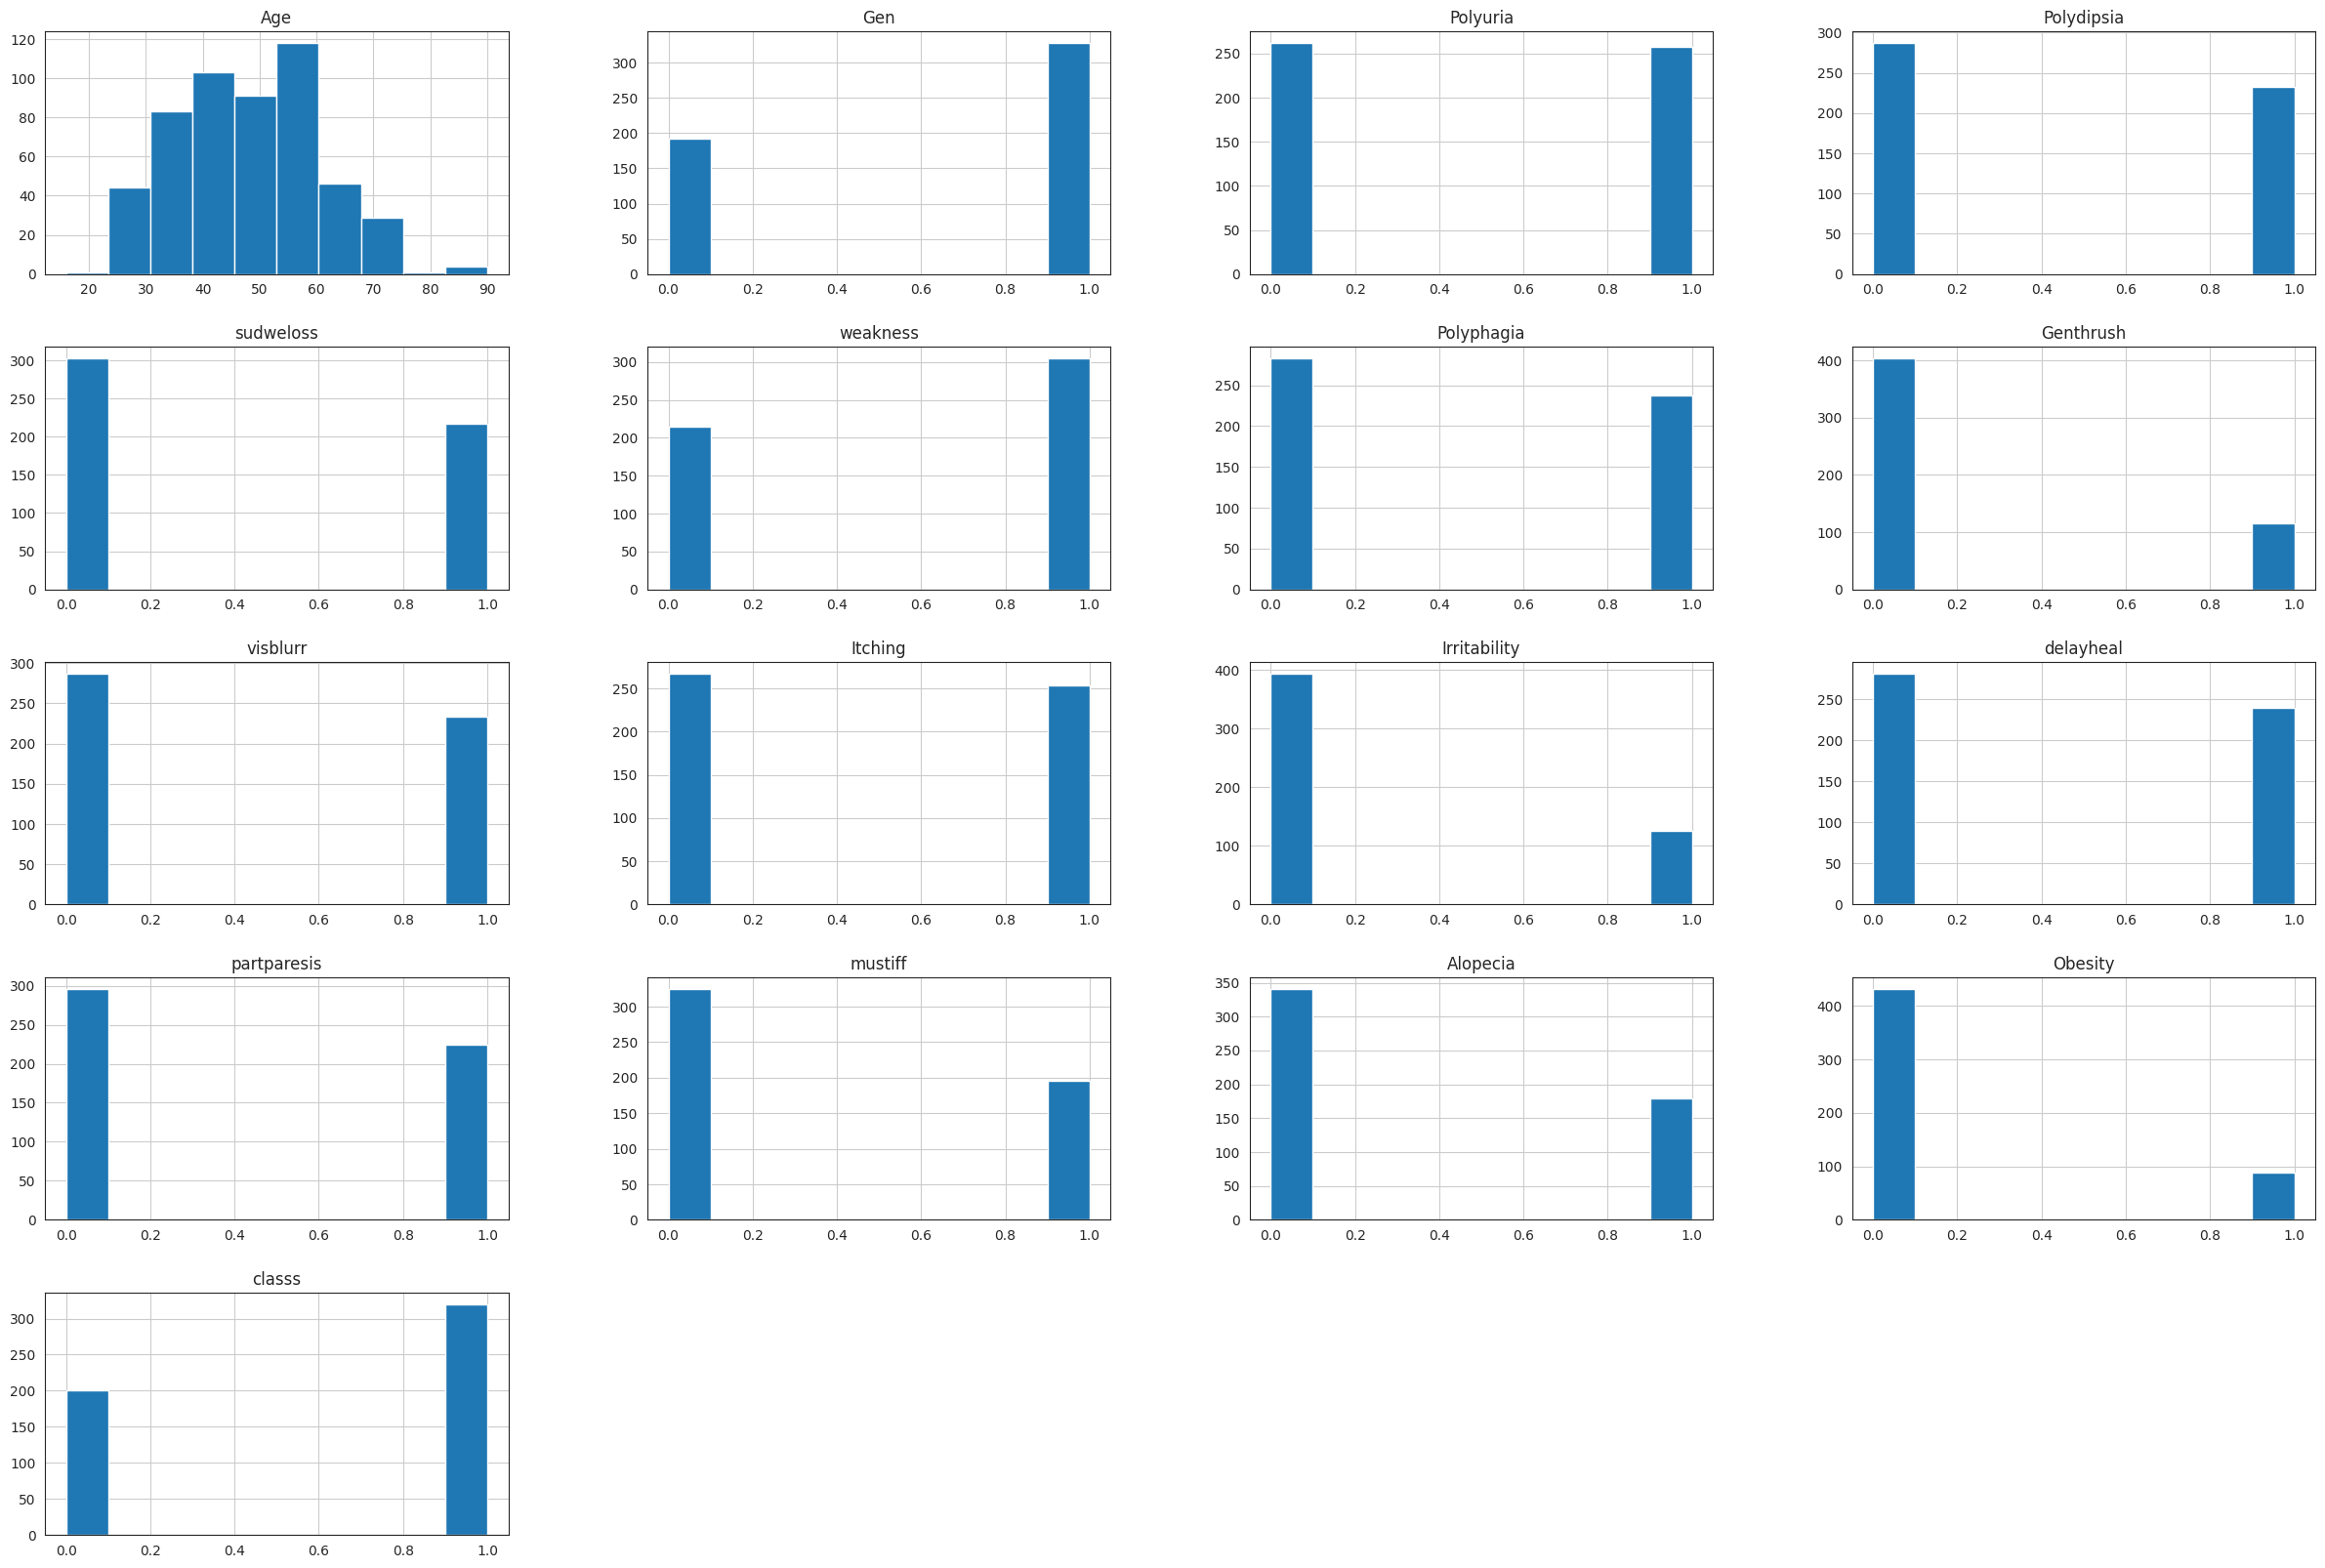

<Figure size 640x480 with 0 Axes>

In [ ]:
 #histogram
import seaborn as snr
df.hist(figsize=(30, 20))
plt.show()
plt.savefig("bg.png")

**pairplot**

<Figure size 1500x500 with 0 Axes>

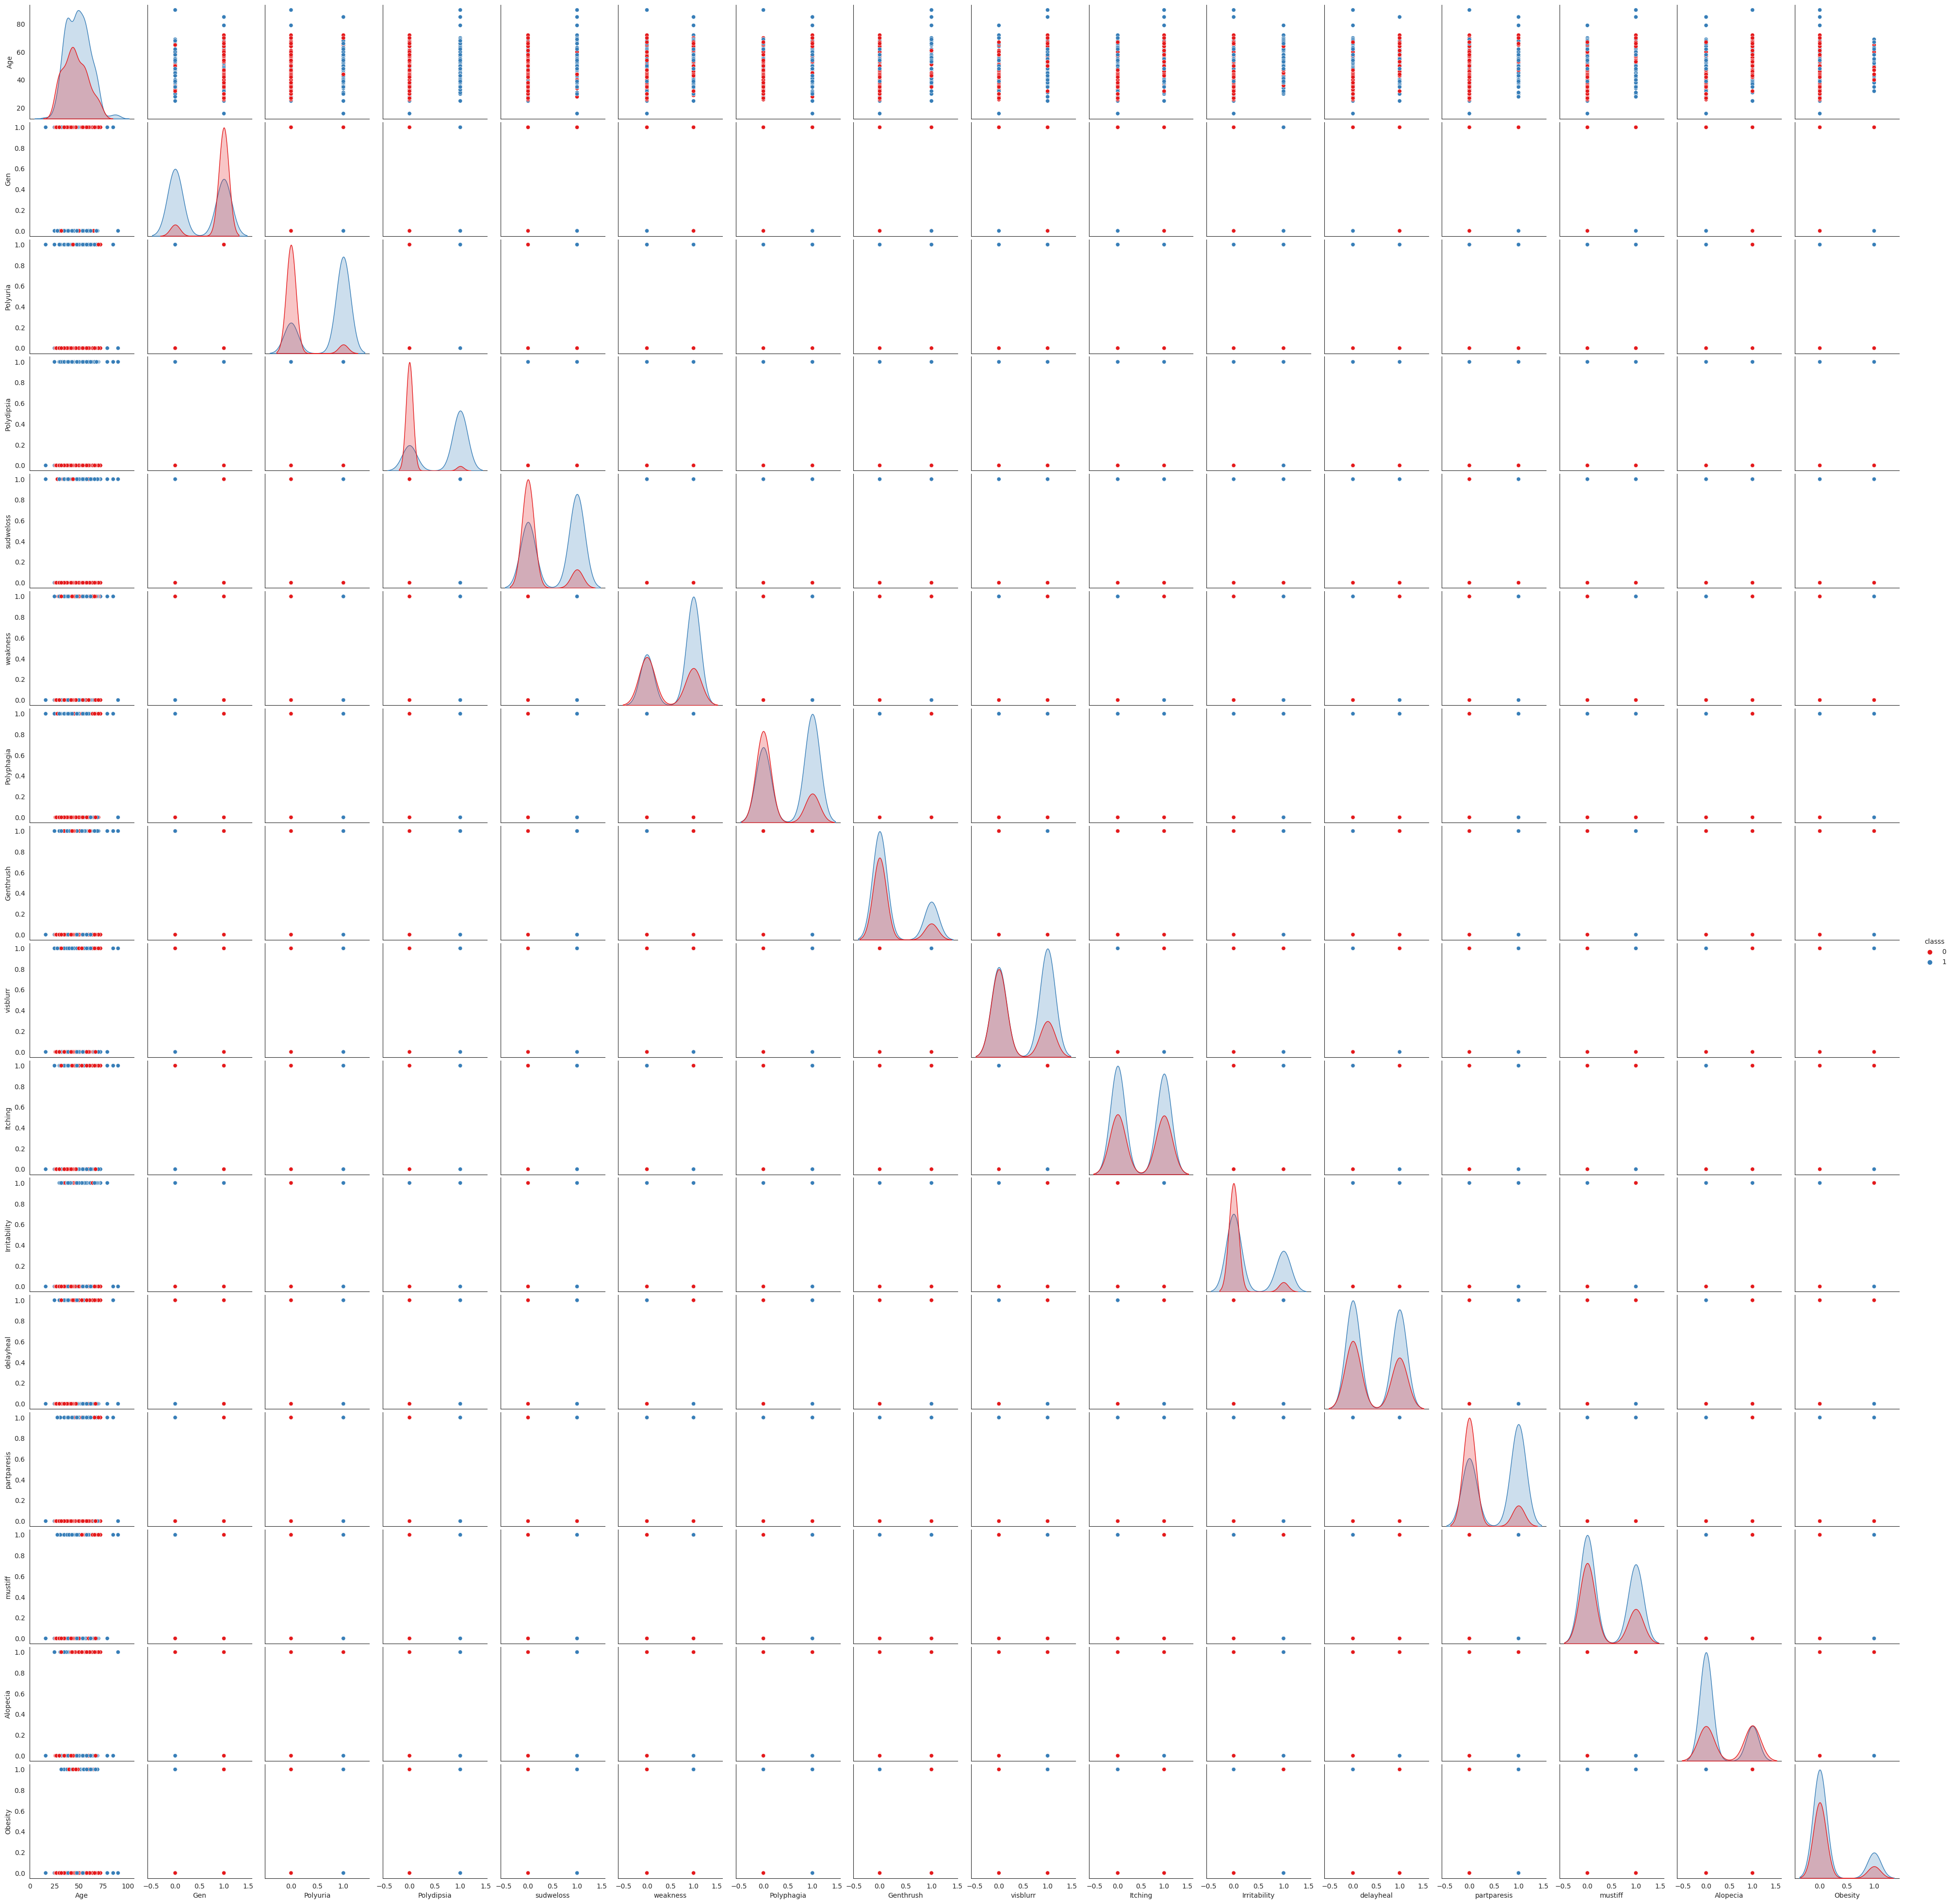

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 5))
sns.pairplot(df, kind='scatter', hue='classs', palette='Set1')
plt.show()
plt.savefig("pair.png")

Age distribution



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



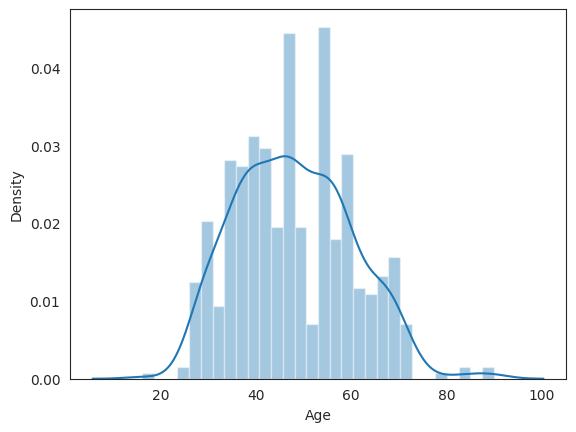

In [ ]:
sns.distplot(df['Age'],bins=30)

plt.savefig("age1.png")

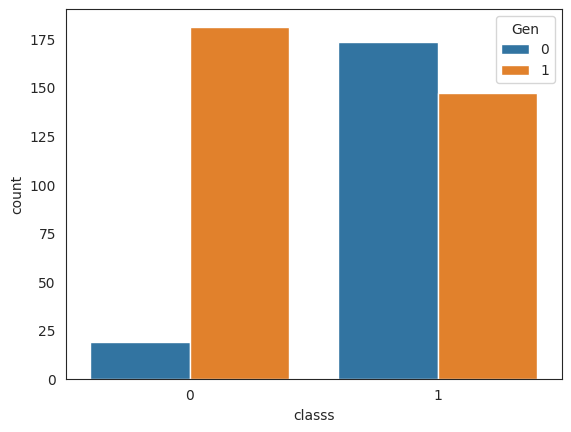

In [ ]:
sns.countplot(x='classs',data=df,hue='Gen')
plt.savefig("gen.png")

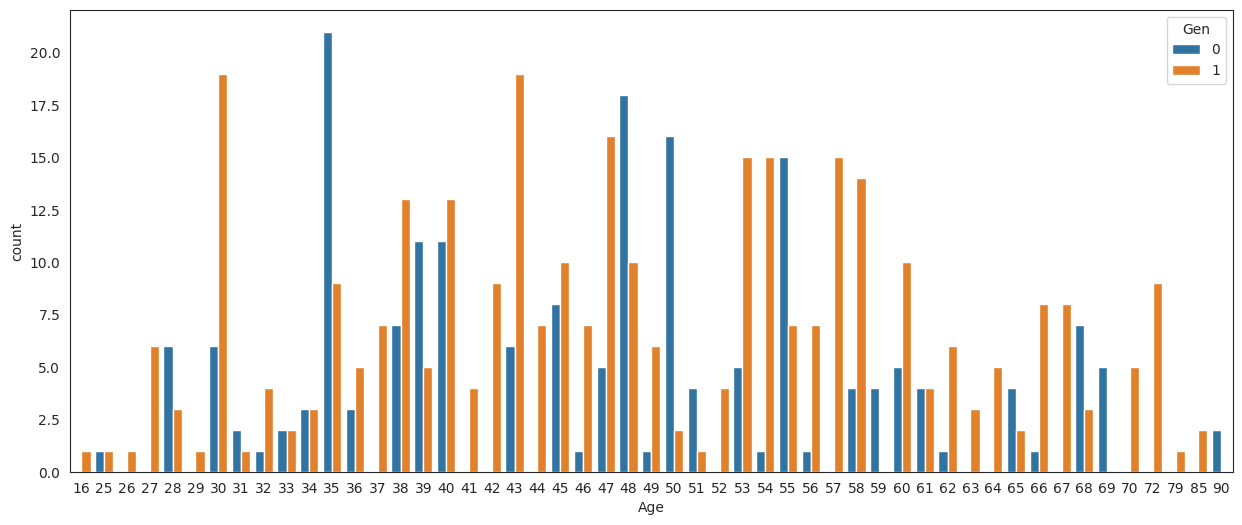

In [ ]:

plt.figure(figsize=(15,6))
sns.countplot(x='Age',data=df,hue='Gen')

plt.savefig("fdn.png")

**KDE**

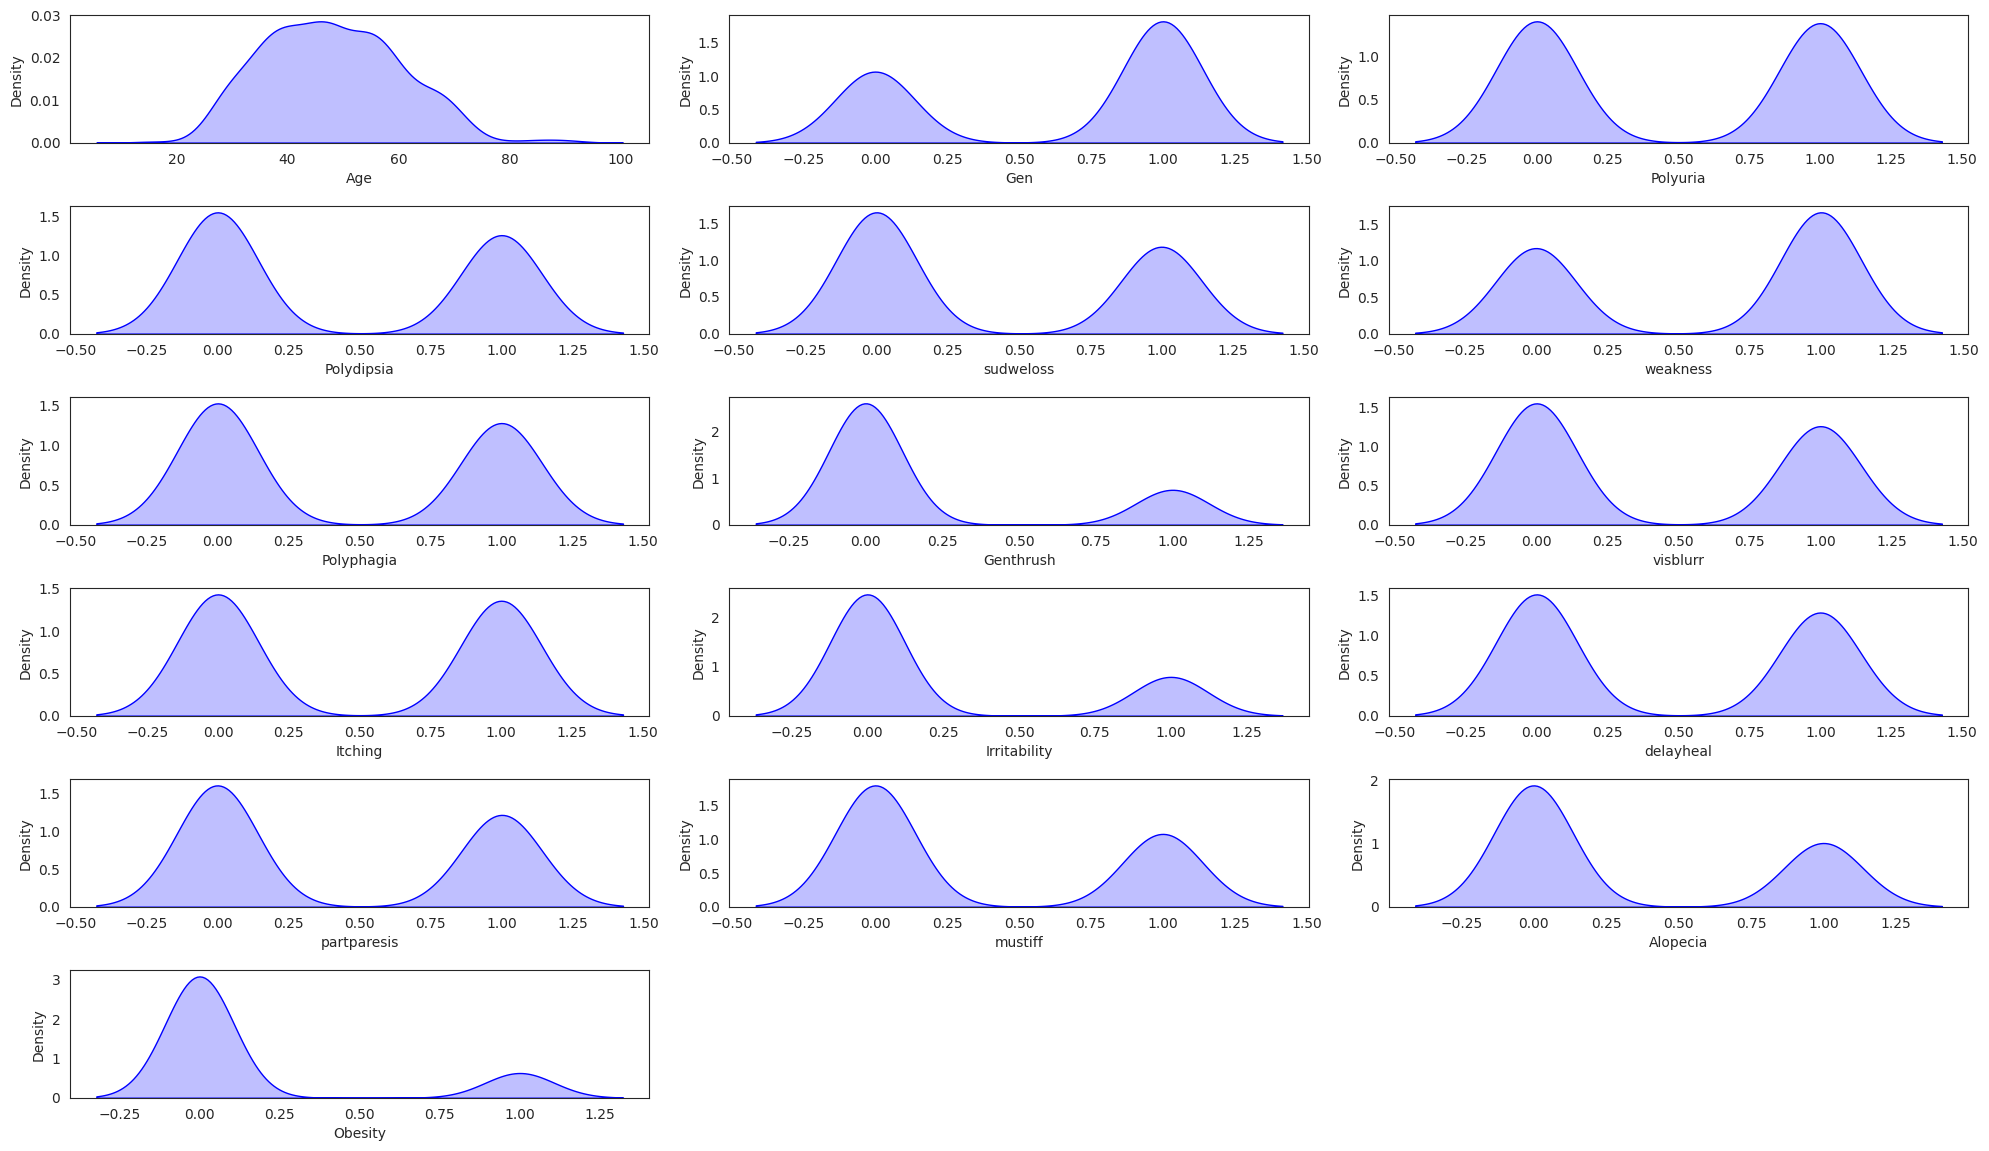

<Figure size 640x480 with 0 Axes>

In [ ]:
# Kernel Density Estimate (KDE) plots for each variable

num_columns = len(df.columns.drop('classs'))


plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns.drop('classs')):
    plt.subplot(8, 3, i+1)
    sns.kdeplot(data=df[column], fill=True,color = "blue")


plt.tight_layout()
plt.savefig("KDEplot.png")
plt.show()
plt.savefig("bsmo1.png")

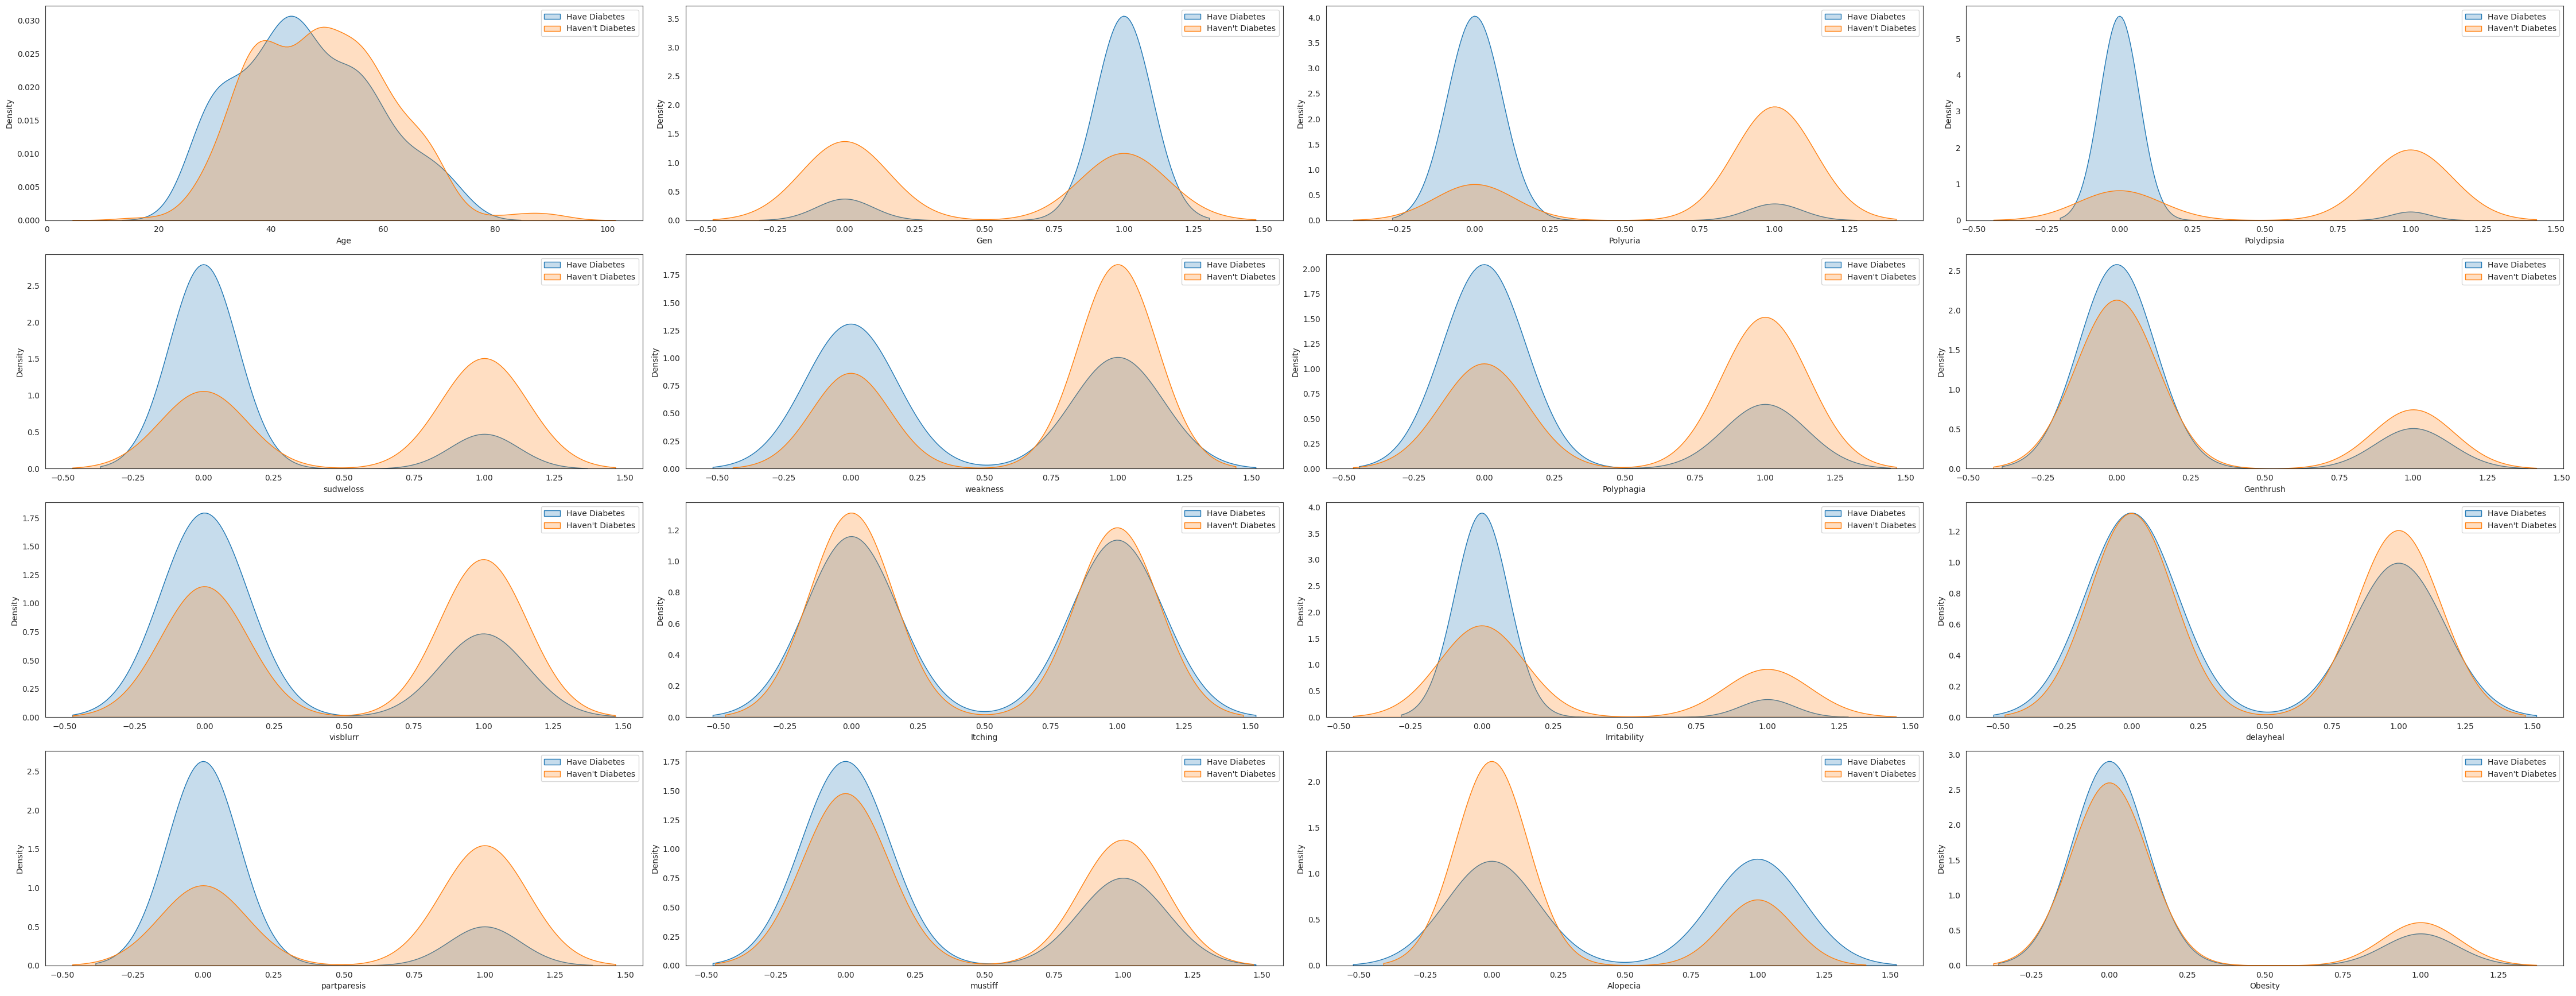

In [ ]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('classs'))


plt.figure(figsize=(45,30))
for i, column in enumerate(df.columns.drop('classs')):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(data=df[df['classs']==0][column], label='Have Diabetes', fill=True)
    sns.kdeplot(data=df[df['classs']==1][column], label="Haven't Diabetes", fill=True)

    plt.legend()

plt.tight_layout()
plt.savefig("KDEplot4.png")
plt.show()

**BOXPLOT**

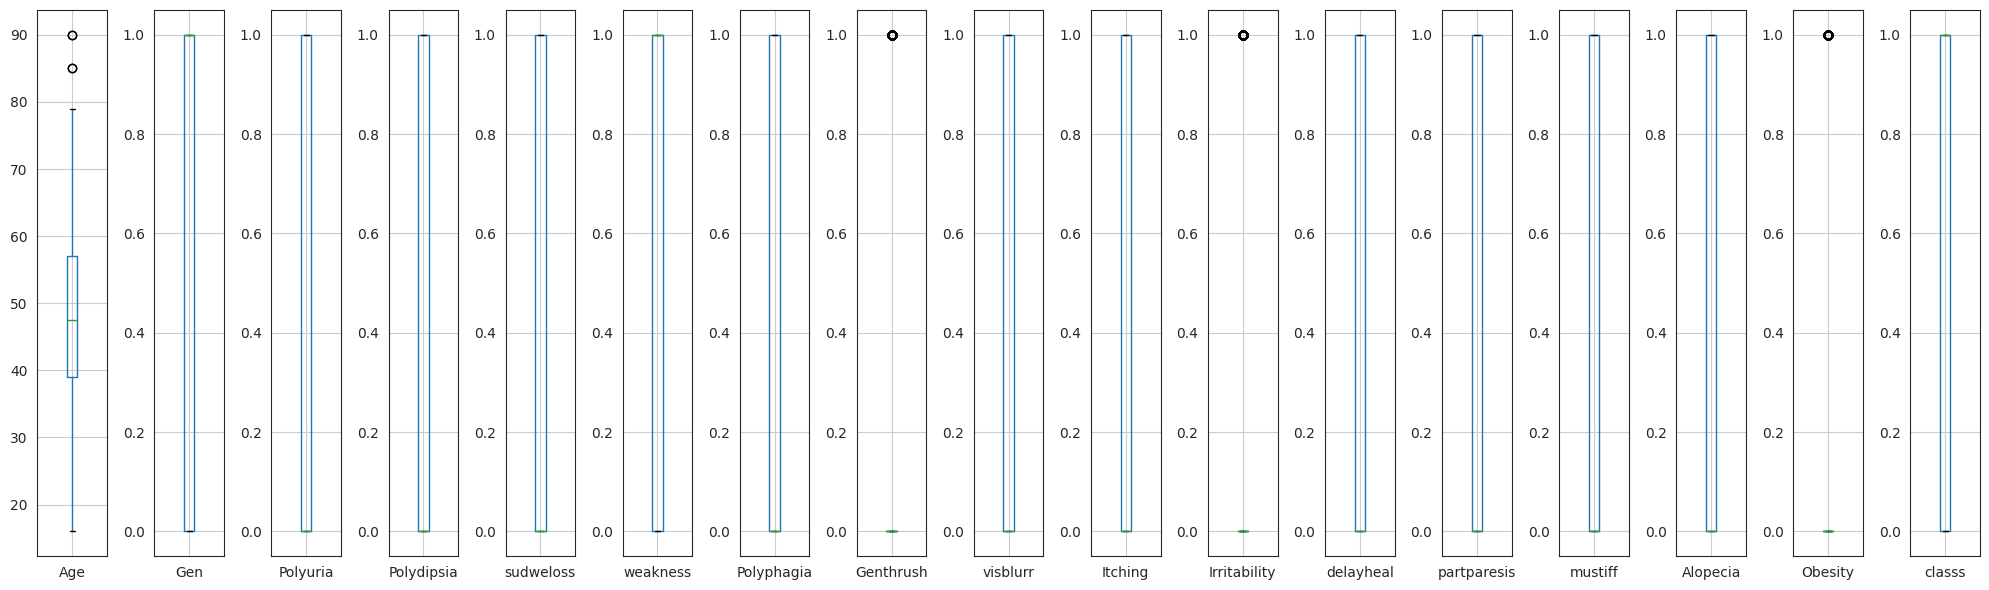

<Figure size 640x480 with 0 Axes>

In [ ]:
numerical_cols = ['Age','Gen','Polyuria','Polydipsia','sudweloss','weakness','Polyphagia','Genthrush','visblurr','Itching','Irritability','delayheal','partparesis','mustiff','Alopecia','Obesity','classs']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols),figsize=(20,6))

# Create box plots for each numerical column
for i, col in enumerate(numerical_cols):
      df.boxplot(column=col, ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig("KDEplot4.png")

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
floor, ceil = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df['Age'] = df['Age'].clip(floor, ceil)

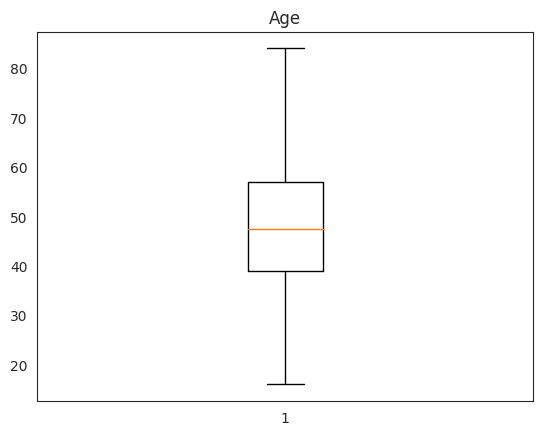

In [ ]:
plt.boxplot(x=df['Age'],data='df')
plt.title('Age')
plt.savefig("Age.png")

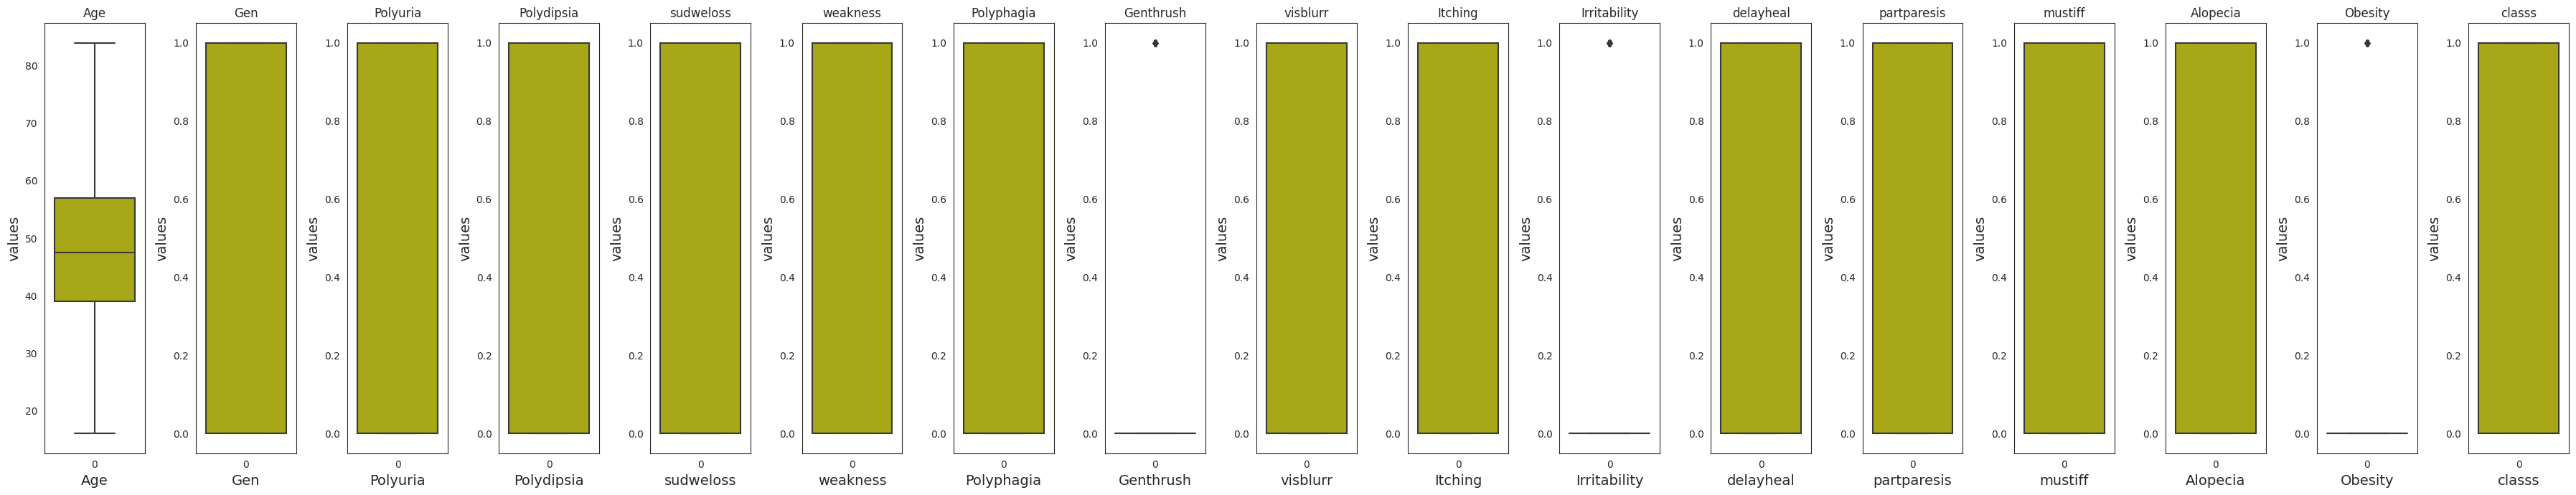

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(36,7))
for i,column in enumerate(df.columns):
    sns.boxplot(ax=axes[i],data=df[column],color='y')
    axes[i].set_xlabel(column,fontsize=14)
    axes[i].set_ylabel('values',fontsize=14)
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()
plt.savefig("box.png")

In [ ]:
import seaborn as snr

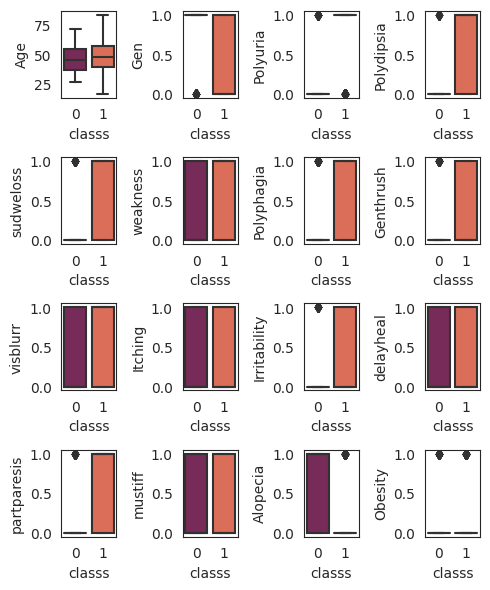

<Figure size 640x480 with 0 Axes>

In [ ]:
figure,axis=plt.subplots(4,4,figsize=(5,6))
snr.boxplot(ax=axis[0][0],y='Age',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[0][1],y='Gen',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[0][2],y='Polyuria' ,x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[0][3],y='Polydipsia',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[1][0],y='sudweloss',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[1][1],y='weakness',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[1][2],y='Polyphagia',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[1][3],y='Genthrush',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[2][0],y='visblurr',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[2][1],y='Itching',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[2][2],y='Irritability',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[2][3],y='delayheal',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[3][0],y='partparesis',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[3][1],y='mustiff',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[3][2],y='Alopecia',x='classs',data=df,palette='rocket')
snr.boxplot(ax=axis[3][3],y='Obesity',x='classs',data=df,palette='rocket')

figure.tight_layout()
plt.show()
plt.savefig("pbox.png")

**Violinplot**

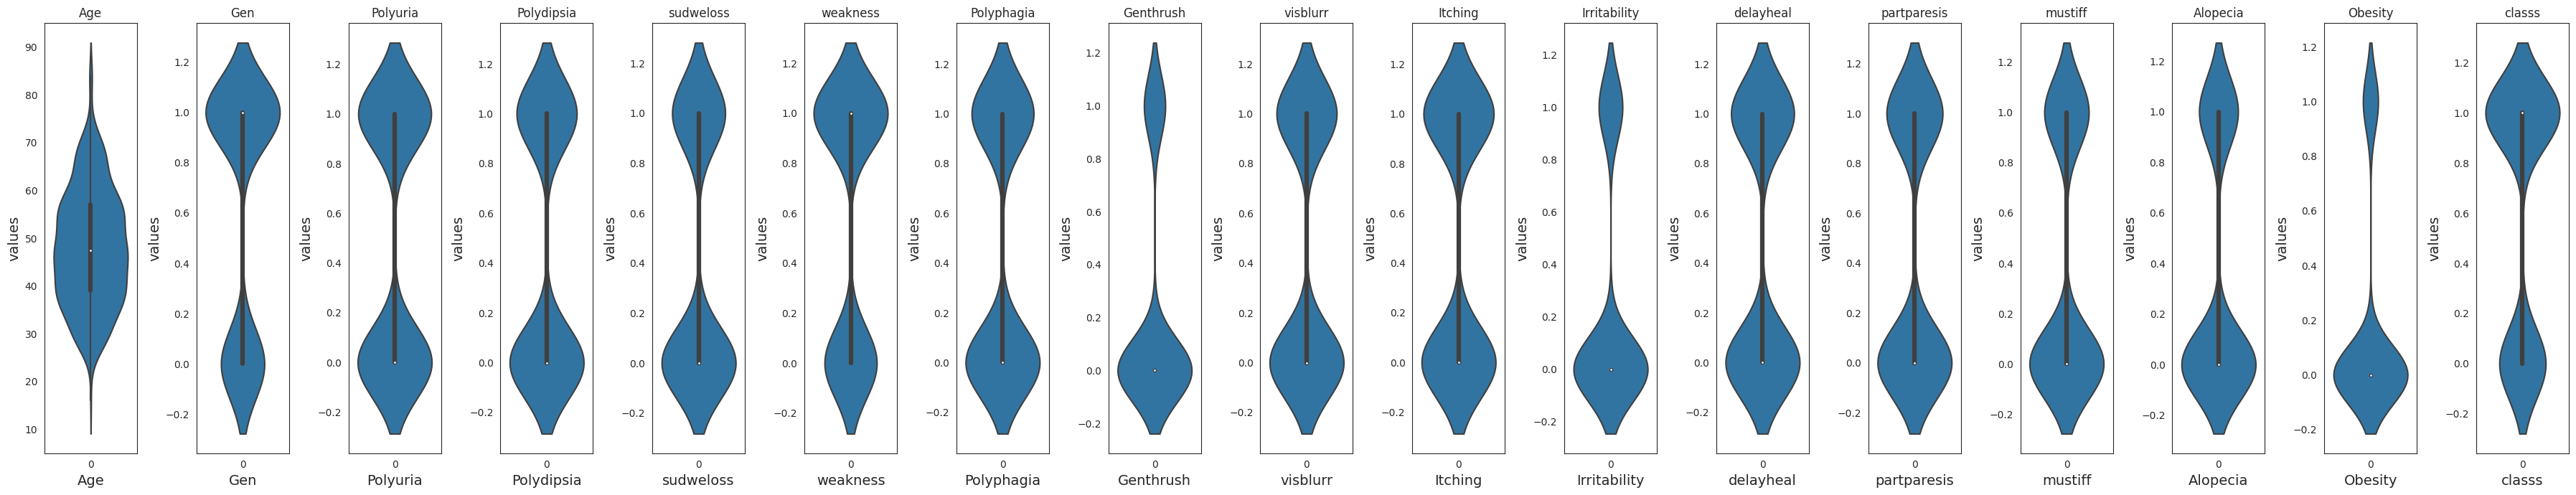

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(36,7))
for i,column in enumerate(df.columns):
    sns.violinplot(ax=axes[i],data=df[column])
    axes[i].set_xlabel(column,fontsize=14)
    axes[i].set_ylabel('values',fontsize=14)
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()
plt.savefig("box.png")

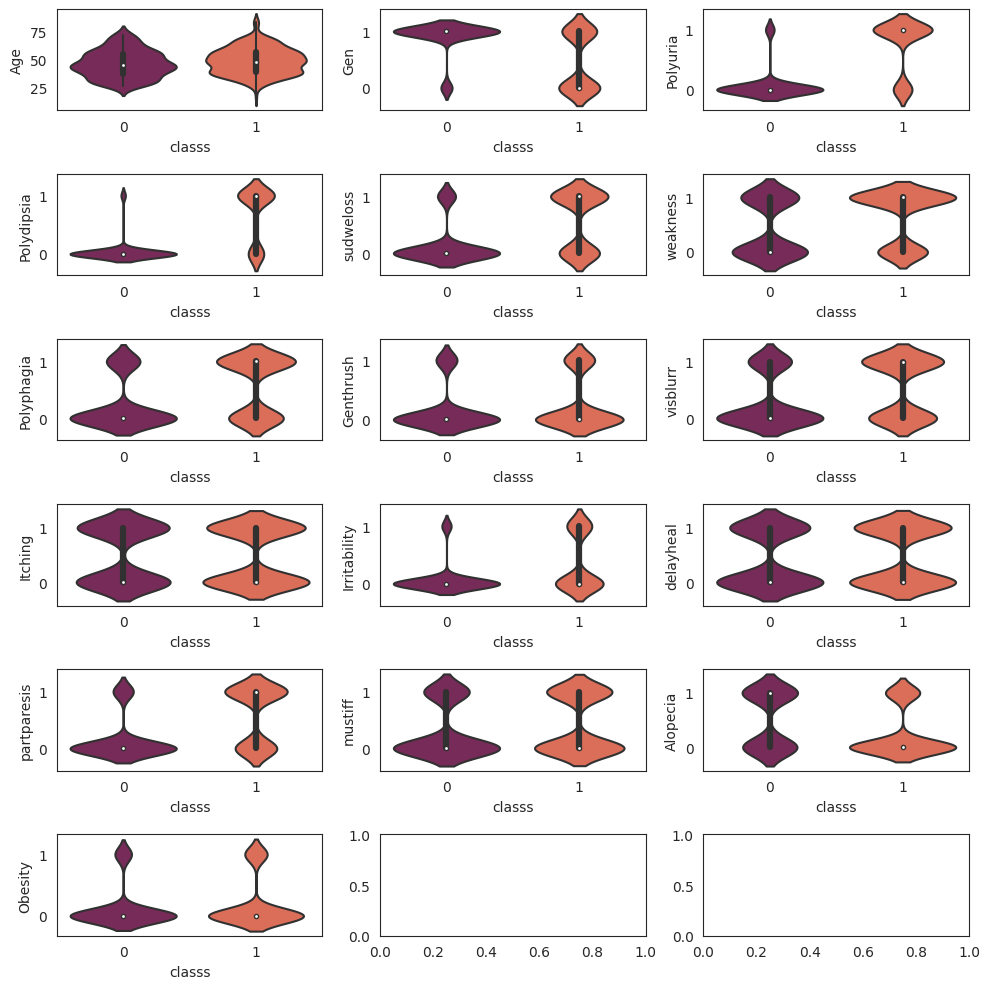

In [ ]:
figure,axis=plt.subplots(6,3,figsize=(10,10))
sns.violinplot(ax=axis[0][0],y='Age',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[0][1],y='Gen',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[0][2],y='Polyuria' ,x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[1][0],y='Polydipsia',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[1][1],y='sudweloss',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[1][2],y='weakness',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[2][0],y='Polyphagia',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[2][1],y='Genthrush',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[2][2],y='visblurr',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[3][0],y='Itching',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[3][1],y='Irritability',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[3][2],y='delayheal',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[4][0],y='partparesis',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[4][1],y='mustiff',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[4][2],y='Alopecia',x='classs',data=df,palette='rocket')
sns.violinplot(ax=axis[5][0],y='Obesity',x='classs',data=df,palette='rocket')

figure.tight_layout()
plt.show()

In [ ]:
# Calculate statistics
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()

# Add a column for the number of distinct values
stats['distinct'] = df.nunique()

# Transpose the DataFrame to swap rows and columns
stats = stats.transpose()
description = pd.DataFrame(stats)

description

count       mean        std   min   25%   50%   75%   max  \
Age           520.0  48.001923  12.065412  16.0  39.0  47.5  57.0  84.0   
Gen           520.0   0.630769   0.483061   0.0   0.0   1.0   1.0   1.0   
Polyuria      520.0   0.496154   0.500467   0.0   0.0   0.0   1.0   1.0   
Polydipsia    520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0   
sudweloss     520.0   0.417308   0.493589   0.0   0.0   0.0   1.0   1.0   
weakness      520.0   0.586538   0.492928   0.0   0.0   1.0   1.0   1.0   
Polyphagia    520.0   0.455769   0.498519   0.0   0.0   0.0   1.0   1.0   
Genthrush     520.0   0.223077   0.416710   0.0   0.0   0.0   0.0   1.0   
visblurr      520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0   
Itching       520.0   0.486538   0.500300   0.0   0.0   0.0   1.0   1.0   
Irritability  520.0   0.242308   0.428892   0.0   0.0   0.0   0.0   1.0   
delayheal     520.0   0.459615   0.498846   0.0   0.0   0.0   1.0   1.0   
partparesis   520.0   0.430769   0.495661   0.0   0.0   0.0   1.0   1.0   
mustiff       520.0   0.375000   0.484589   0.0   0.0   0.0   1.0   1.0   
Alopecia      520.0   0.344231   0.475574   0.0   0.0   0.0   1.0   1.0   
Obesity       520.0   0.169231   0.375317   0.0   0.0   0.0   0.0   1.0   
classs        520.0   0.615385   0.486973   0.0   0.0   1.0   1.0   1.0   
distinct        NaN        NaN        NaN   NaN   NaN   NaN   NaN   NaN   

                     var      skew      kurt  
Age           145.574177  0.274059 -0.406355  
Gen             0.233348 -0.543509 -1.711194  
Polyuria        0.250467  0.015430 -2.007498  
Polydipsia      0.247780  0.209426 -1.963708  
sudweloss       0.243631  0.336359 -1.894163  
weakness        0.242978 -0.352476 -1.883018  
Polyphagia      0.248522  0.178134 -1.975883  
Genthrush       0.173648  1.334223 -0.220713  
visblurr        0.247780  0.209426 -1.963708  
Itching         0.250300  0.054022 -2.004807  
Irritability    0.183948  1.206305 -0.546948  
delayheal       0.248848  0.162537 -1.981217  
partparesis     0.245680  0.280426 -1.928795  
mustiff         0.234827  0.517893 -1.738488  
Alopecia        0.226171  0.657608 -1.573619  
Obesity         0.140863  1.769420  1.135197  
classs          0.237142 -0.475715 -1.780558  
distinct             NaN       NaN       NaN

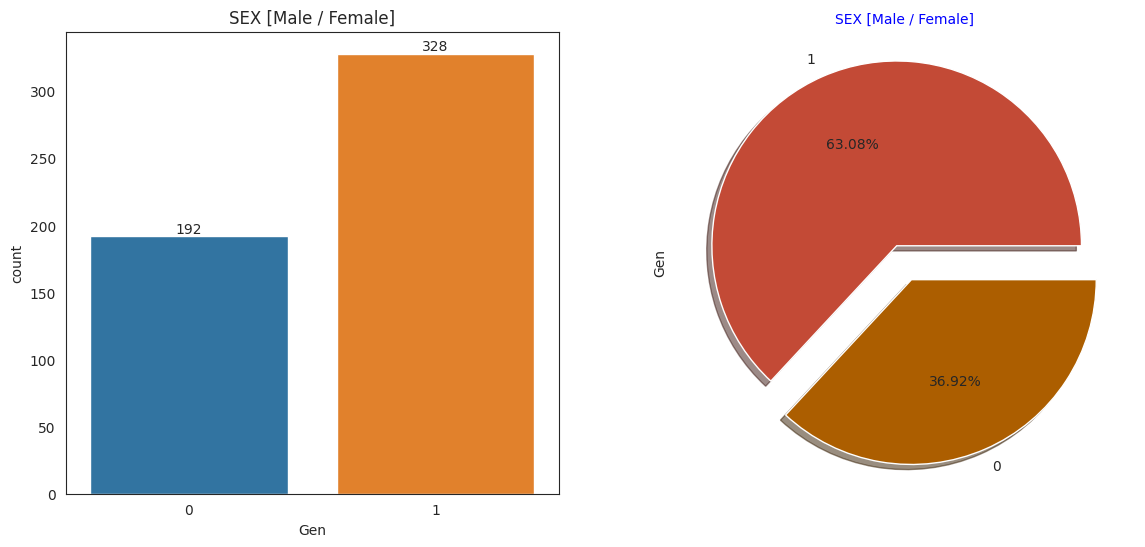

In [ ]:
colors = ['#C34A36', '#AC5E00']

plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Gen', data=df)
ax.bar_label(ax.containers[0])
plt.title("SEX [Male / Female]")

ax =plt.subplot(1,2,2)
ax=df['Gen'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True,colors = colors)
ax.set_title(label = "SEX [Male / Female]", fontsize = 20,color='Blue',font='Times New Roman')
plt.savefig("gen.png")

In [ ]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Age                           50
Gen                            2
Polyuria                       2
Polydipsia                     2
sudweloss                      2
weakness                       2
Polyphagia                     2
Genthrush                      2
visblurr                       2
Itching                        2
Irritability                   2
delayheal                      2
partparesis                    2
mustiff                        2
Alopecia                       2
Obesity                        2
classs                         2

In [ ]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique() <7:
       cate_val.append(column)
    else:
       cont_val.append(column)

In [ ]:
cont_val

['Age']

In [ ]:
cate_val

['Gen',
 'Polyuria',
 'Polydipsia',
 'sudweloss',
 'weakness',
 'Polyphagia',
 'Genthrush',
 'visblurr',
 'Itching',
 'Irritability',
 'delayheal',
 'partparesis',
 'mustiff',
 'Alopecia',
 'Obesity',
 'classs']

In [ ]:
df.groupby(['classs']).mean()

Age       Gen  Polyuria  Polydipsia  sudweloss  weakness  \
classs                                                                   
0       46.360000  0.905000  0.075000    0.040000     0.1450   0.43500   
1       49.028125  0.459375  0.759375    0.703125     0.5875   0.68125   

        Polyphagia  Genthrush  visblurr  Itching  Irritability  delayheal  \
classs                                                                      
0         0.240000   0.165000  0.290000  0.49500       0.08000   0.430000   
1         0.590625   0.259375  0.546875  0.48125       0.34375   0.478125   

        partparesis   mustiff  Alopecia   Obesity  
classs                                             
0              0.16  0.300000   0.50500  0.135000  
1              0.60  0.421875   0.24375  0.190625

In [ ]:
df.columns = ['Age','Gen','Polyuria','Polydipsia','sudweloss','weakness','Polyphagia','Genthrush','visblurr','Itching','Irritability','delayheal','partparesis','mustiff','Alopecia','Obesity','classs']

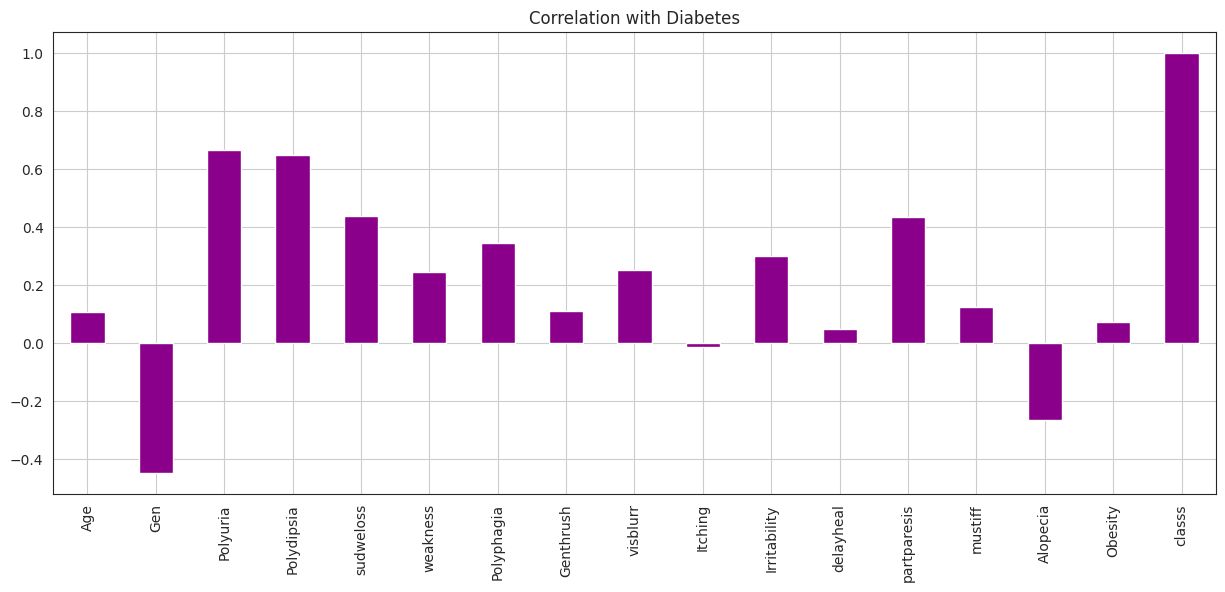

In [ ]:
#check correlation with diabetes column
df.corrwith(df.classs).plot(kind='bar', grid=True, figsize=(15,6), title="Correlation with Diabetes",color="darkmagenta");
plt.savefig('Histogram2.png')

**Smote**

In [ ]:
X = df.drop('classs',axis=1)
y= df['classs']

Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X, y)

In [ ]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns)

In [ ]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

column      scores
0            Age   18.252835
1            Gen   38.747637
2       Polyuria  116.184593
3     Polydipsia  120.785515
4      sudweloss   57.749309
5       weakness   12.724262
6     Polyphagia   33.198418
7      Genthrush    4.914009
8       visblurr   18.124571
9        Itching    0.047826
10  Irritability   35.334127
11     delayheal    0.620188
12   partparesis   55.314286
13       mustiff    4.875000
14      Alopecia   24.402793
15       Obesity    2.250284

In [ ]:
print(featurescores.nlargest(10,'scores'))

          column      scores
3     Polydipsia  120.785515
2       Polyuria  116.184593
4      sudweloss   57.749309
12   partparesis   55.314286
1            Gen   38.747637
10  Irritability   35.334127
6     Polyphagia   33.198418
14      Alopecia   24.402793
0            Age   18.252835
8       visblurr   18.124571


In [ ]:
print(featurescores.nlargest(17,'scores'))

          column      scores
3     Polydipsia  120.785515
2       Polyuria  116.184593
4      sudweloss   57.749309
12   partparesis   55.314286
1            Gen   38.747637
10  Irritability   35.334127
6     Polyphagia   33.198418
14      Alopecia   24.402793
0            Age   18.252835
8       visblurr   18.124571
5       weakness   12.724262
7      Genthrush    4.914009
13       mustiff    4.875000
15       Obesity    2.250284
11     delayheal    0.620188
9        Itching    0.047826


Feature importance

[0.0488412  0.11153669 0.21380085 0.1984032  0.06082902 0.02077268
 0.02970503 0.02728964 0.02898057 0.03648813 0.04052493 0.03893995
 0.05688888 0.0257265  0.04131393 0.01995878]


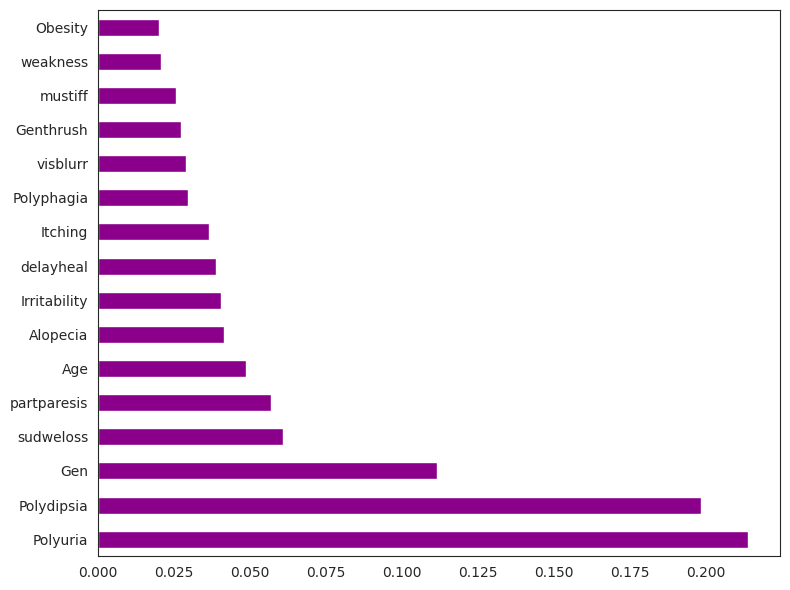

In [ ]:
#step 2
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(17).plot(kind='barh',color="darkmagenta");
plt.tight_layout()
plt.savefig('Histcorr.png')

In [ ]:
#1st check all without feature selection

In [ ]:
X=df[['Age','Gen','Alopecia','Polyuria','Irritability','Polydipsia','sudweloss','weakness','Polyphagia','visblurr','partparesis']]

First check ML without balancing

In [ ]:
X = df.drop('classs',axis=1)
y= df['classs']

Smote

In [ ]:
sm = SMOTE(random_state=8, k_neighbors=3)
X_bal, y_bal = sm.fit_resample(X, y)

Training & Test Set

In [ ]:
#without balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [ ]:
y.value_counts()

1    320
0    200
Name: classs, dtype: int64

balancing

In [ ]:
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=8)

In [ ]:
y_bal.value_counts()

1    320
0    320
Name: classs, dtype: int64

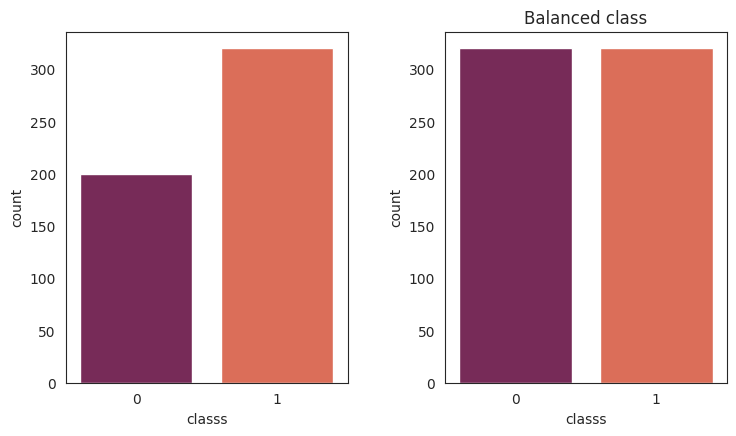

<Figure size 640x480 with 0 Axes>

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(8,5))
plt.title('Imbalanced class')
sns.countplot(x='classs',data=df,ax=axis[0],palette='rocket')

sns.countplot(x=y_bal,data=df,ax=axis[1],dodge=True,palette='rocket')
plt.title('Balanced class')
plt.tight_layout(pad=3.0)
plt.show()
plt.savefig("csc.png")

In [ ]:
unique, counts = np.unique(y_bal, return_counts=True)

# Print the class distribution
for label, count in zip(unique, counts):
    print(f'Class {label}: {count} samples')

Class 0: 320 samples
Class 1: 320 samples


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gen           520 non-null    int64
 2   Polyuria      520 non-null    int64
 3   Polydipsia    520 non-null    int64
 4   sudweloss     520 non-null    int64
 5   weakness      520 non-null    int64
 6   Polyphagia    520 non-null    int64
 7   Genthrush     520 non-null    int64
 8   visblurr      520 non-null    int64
 9   Itching       520 non-null    int64
 10  Irritability  520 non-null    int64
 11  delayheal     520 non-null    int64
 12  partparesis   520 non-null    int64
 13  mustiff       520 non-null    int64
 14  Alopecia      520 non-null    int64
 15  Obesity       520 non-null    int64
 16  classs        520 non-null    int64
dtypes: int64(17)
memory usage: 69.2 KB


Standard Sclaar

without scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)



from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import matthews_corrcoef,roc_curve,auc
print(classification_report(y_true=y_test,y_pred=y_pred))



kn.score(X_test,y_test)




              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.98      0.91      0.95        47

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



0.9479166666666666

In [ ]:
from sklearn.metrics import log_loss
matthews_corrcoef(y_true=y_test,y_pred=y_pred)


0.8974127620733039

In [ ]:

log_loss(y_test,y_pred,eps=1e-15)

1.7989029330414965

In [ ]:
 auc = roc_auc_score(y_test, y_pred)
 auc

0.9472427268779852

In [ ]:
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Confusion Matrix:
[[48  1]
 [ 4 43]]


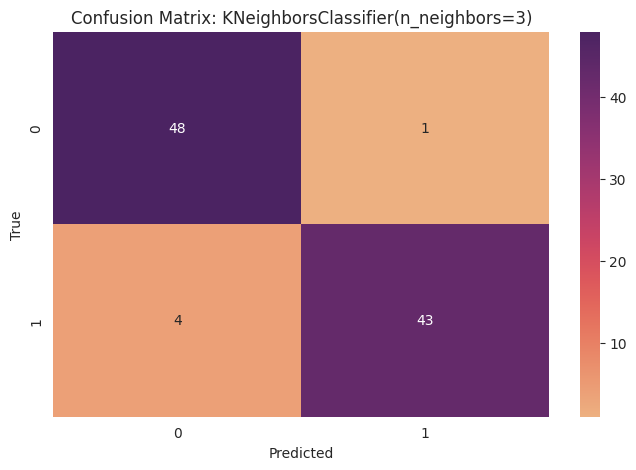

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(kn))
plt.show()
print()
plt.savefig('KNN')

In [ ]:
predicted_probab_kn = kn.predict_proba(X_test)
predicted_probab_kn = predicted_probab_kn[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_kn)


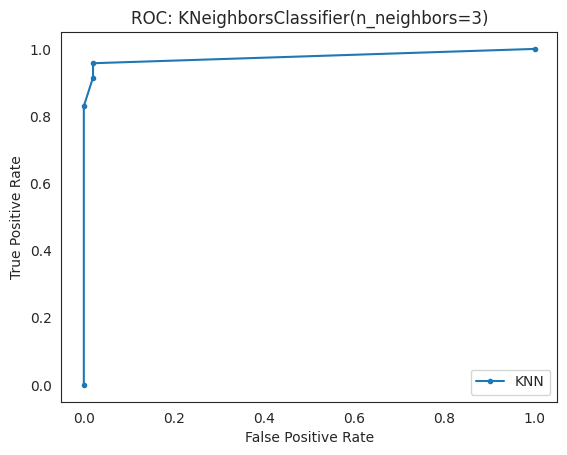

In [ ]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC: {}'.format(kn))
pyplot.legend()
pyplot.show()

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred1=RF.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred1))
RF.score(X_test,y_test)



              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        47

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



0.9895833333333334

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred1)





0.9793614941226824

In [ ]:

log_loss(y_true=y_test,y_pred=y_pred1)

0.3754547228033039

In [ ]:
 auc = roc_auc_score(y_test, y_pred1)
 auc

0.9893617021276595

In [ ]:
    cm1 = confusion_matrix(y_test, y_pred1)
    print("Confusion Matrix:")
    print(cm1)

Confusion Matrix:
[[49  0]
 [ 1 46]]


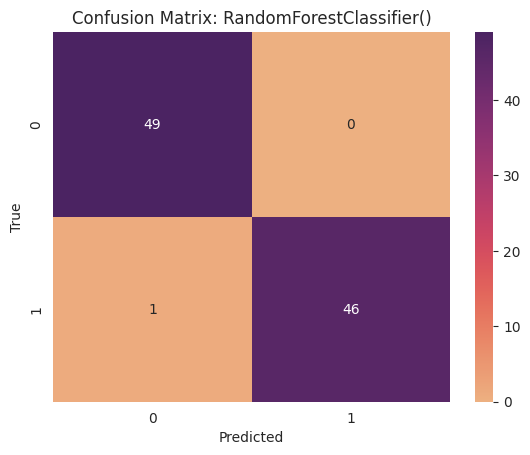

In [ ]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(RF))
plt.show()
print()

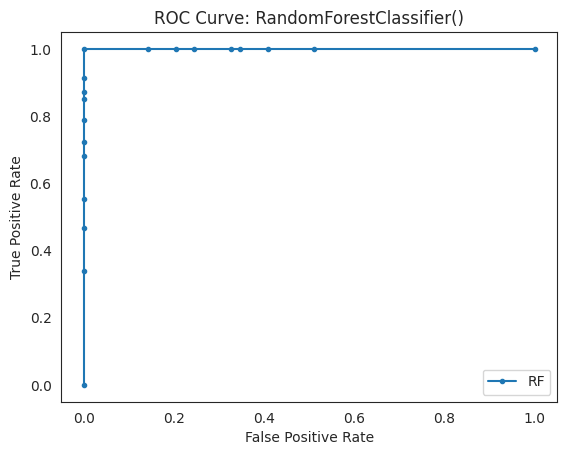

In [ ]:
predicted_probab_rf = RF.predict_proba(X_test)
predicted_probab_rf = predicted_probab_rf[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_rf)
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='RF')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(RF))
pyplot.show()

SVC

In [ ]:
from sklearn.svm import SVC
S = SVC(probability=True,kernel='rbf',C=50)
S.fit(X_train,y_train)
y_pred2=S.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred2))

S.score(X_test,y_test)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



0.9791666666666666

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred2)

0.959114109396559

In [ ]:
log_loss(y_test,y_pred2,eps=1e-15)

0.7195578415606402

In [ ]:
 auc = roc_auc_score(y_test, y_pred2)
 auc

0.9787234042553192

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[49  0]
 [ 2 45]]


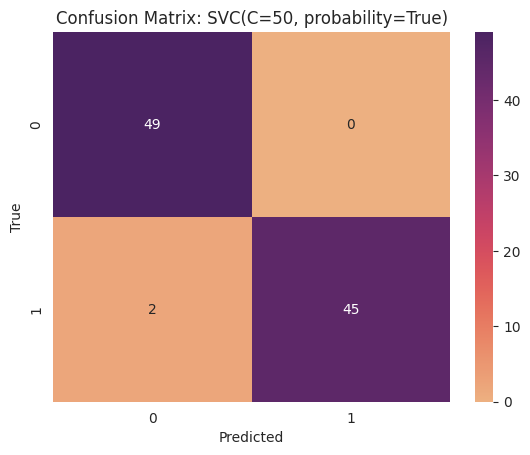

In [ ]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(S))
plt.show()
print()

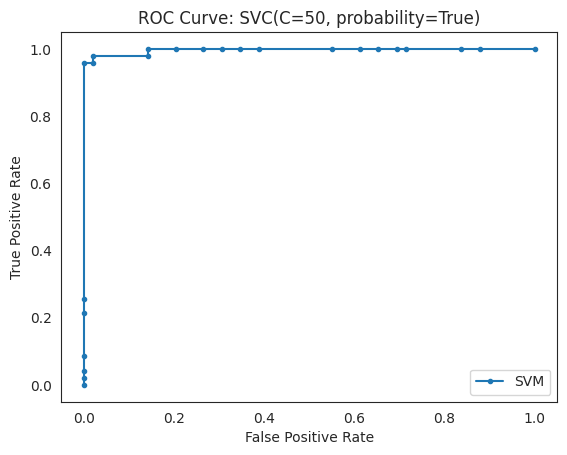

In [ ]:
predicted_probab_s= S.predict_proba(X_test)
predicted_probab_s = predicted_probab_s[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_s)

pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(S))
pyplot.show()

LG

In [ ]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='liblinear',multi_class='ovr')
LG.fit(X_train,y_train)



y_pred3=LG.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred3))





LG.score(X_test,y_test)




              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.98      0.94      0.96        47

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



0.9583333333333334

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred3)

0.9173567604160285

In [ ]:
log_loss(y_test,y_pred3,eps=1e-15)

1.4391240122611773

In [ ]:
 auc = roc_auc_score(y_test, y_pred3)
 auc

0.9578810247503257

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm3)


Confusion Matrix:
[[48  1]
 [ 3 44]]


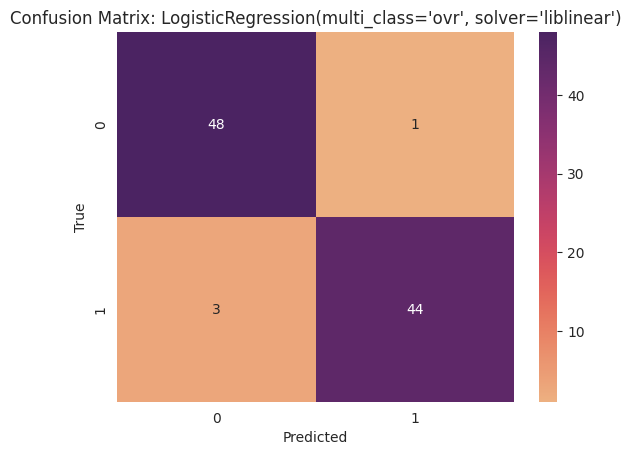

In [ ]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(LG))
plt.show()
print()

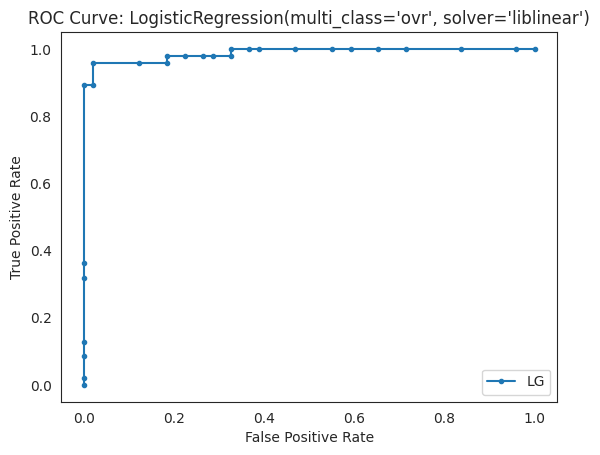

In [ ]:
predicted_probab_lr= LG.predict_proba(X_test)
predicted_probab_lr = predicted_probab_lr[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_lr)

pyplot.plot(fpr, tpr, marker='.', label='LG')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(LG))
pyplot.show()

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
DC.fit(X_train,y_train)


y_pred4=DC.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred4))





DC.score(X_test,y_test)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



0.9791666666666666

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred4)

0.959114109396559

In [ ]:

log_loss(y_test,y_pred4,eps=1e-15)

0.7195578415606402

In [ ]:
 auc = roc_auc_score(y_test, y_pred4)
 auc

0.9787234042553192

In [ ]:
cm4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(cm4)

Confusion Matrix:
[[49  0]
 [ 2 45]]


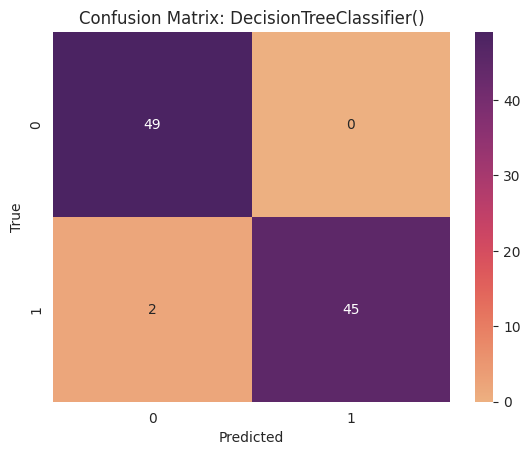

In [ ]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(DC))
plt.show()
print()

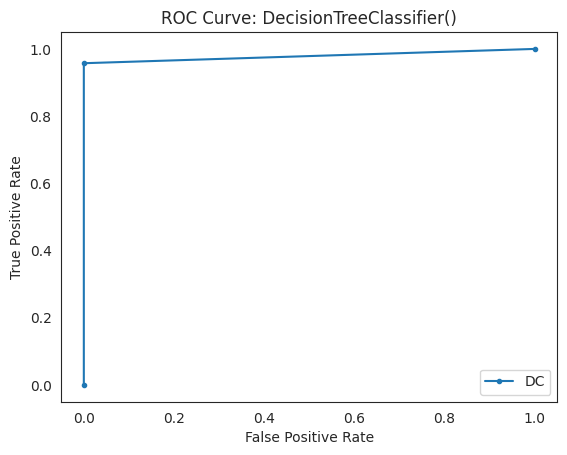

In [ ]:
predicted_probab_dt= DC.predict_proba(X_test)
predicted_probab_dt = predicted_probab_dt[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_dt)

pyplot.plot(fpr, tpr, marker='.', label='DC')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(DC))
pyplot.show()

GU

ADA

In [ ]:

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)


y_pred6=ada.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred6))


ada.score(X_test,y_test)






              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.93      0.91      0.92        47

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



0.9270833333333334

In [ ]:

matthews_corrcoef(y_true=y_test,y_pred=y_pred6)

0.8542256865329163

In [ ]:
log_loss(y_test,y_pred6,eps=1e-15)

2.5184774328819315

In [ ]:
 auc = roc_auc_score(y_test, y_pred6)
 auc

0.9268345636126791

In [ ]:
    cm6 = confusion_matrix(y_test, y_pred6)
    print("Confusion Matrix:")
    print(cm6)

Confusion Matrix:
[[46  3]
 [ 4 43]]


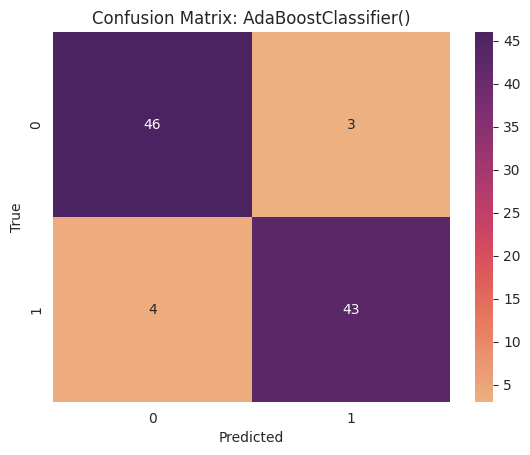

In [ ]:
sns.heatmap(cm6, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(ada))
plt.show()
print()

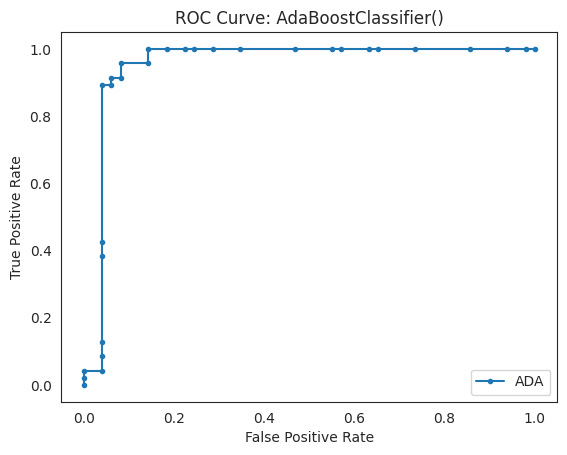

In [ ]:
predicted_probab_ad= ada.predict_proba(X_test)
predicted_probab_ad = predicted_probab_ad[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_ad)

pyplot.plot(fpr, tpr, marker='.', label='ADA')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(ada))
pyplot.show()

GRAdi

multiplayer

In [ ]:

mu = MLPClassifier()
mu.fit(X_train,y_train)


y_pred8=mu.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred8))


mu.score(X_test,y_test)







              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.96      0.97        47

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.96875

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred8)

0.937649558259427

In [ ]:
log_loss(y_test,y_pred8,eps=1e-15)

1.0793450914808578

In [ ]:
 auc = roc_auc_score(y_test, y_pred8)
 auc

0.968519322622666

In [ ]:
    cm8 = confusion_matrix(y_test, y_pred8)
    print("Confusion Matrix:")
    print(cm8)

Confusion Matrix:
[[48  1]
 [ 2 45]]


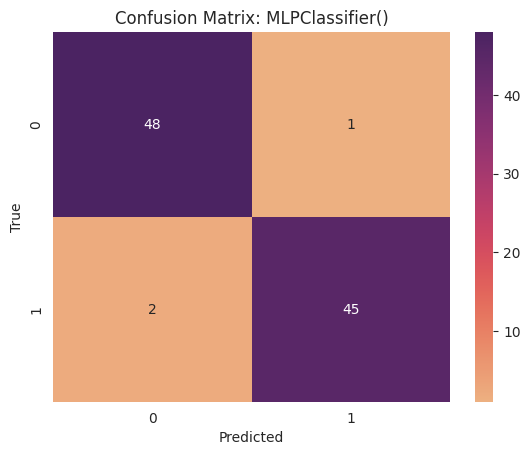

In [ ]:

sns.heatmap(cm8, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: {}'.format(mu))
plt.show()
print()

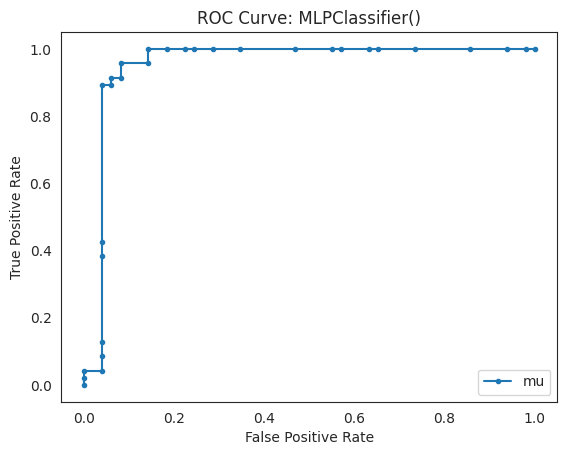

In [ ]:
predicted_probab_ml= ada.predict_proba(X_test)
predicted_probab_ml = predicted_probab_ml[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_ml)

pyplot.plot(fpr, tpr, marker='.', label='mu')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: {}'.format(mu))
pyplot.show()

xgb

In [ ]:
from xgboost import XGBClassifier
xb =  XGBClassifier()
xb.fit(X_train,y_train)


y_pred9=xb.predict(X_test)


print(classification_report(y_true=y_test,y_pred=y_pred9))


xb.score(X_test,y_test)







              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



0.9791666666666666

In [ ]:
matthews_corrcoef(y_true=y_test,y_pred=y_pred9)

0.959114109396559

In [ ]:
log_loss(y_test,y_pred9,eps=1e-15)

0.7195578415606402

In [ ]:
 auc = roc_auc_score(y_test, y_pred9)
 auc

0.9787234042553192

In [ ]:
    cm9 = confusion_matrix(y_test, y_pred9)
    print("Confusion Matrix:")
    print(cm9)

Confusion Matrix:
[[49  0]
 [ 2 45]]


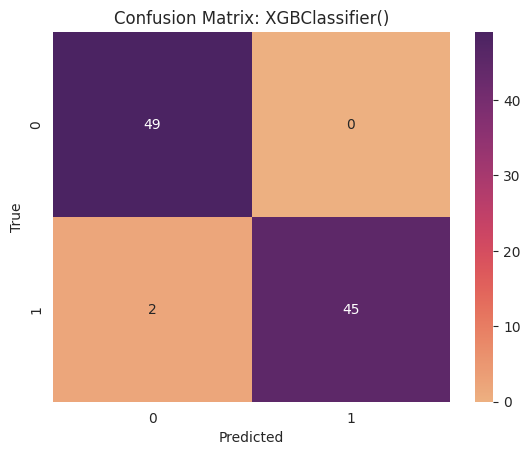

In [ ]:

sns.heatmap(cm9, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: XGBClassifier()')
plt.show()
print()

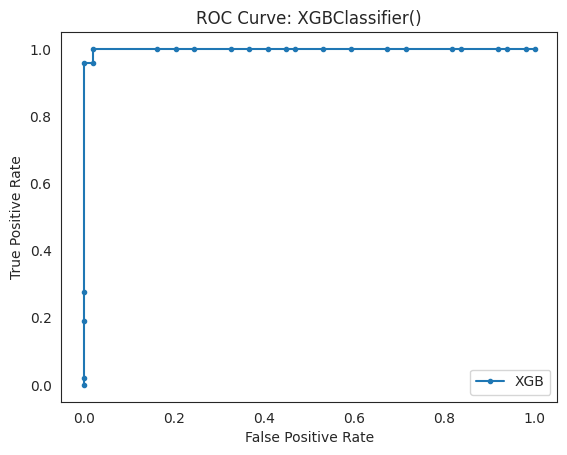

In [ ]:
predicted_probab_xb= xb.predict_proba(X_test)
predicted_probab_xb = predicted_probab_xb[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_xb)

pyplot.plot(fpr, tpr, marker='.', label='XGB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.title('ROC Curve: XGBClassifier()')
pyplot.show()

In [ ]:
#Bar

In [ ]:
model =('kn','RF','LG','S','DC','ada','xb','mu')


In [ ]:
kn1=kn.score(X_test,y_test)
RF1=RF.score(X_test,y_test)
LG1=LG.score(X_test,y_test)
S1=S.score(X_test,y_test)
DC1=DC.score(X_test,y_test)
ada1=ada.score(X_test,y_test)
xb1=xb.score(X_test,y_test)
mu1=mu.score(X_test,y_test)


In [ ]:

best_score=(kn1,RF1,LG1,S1,DC1,ada1,xb1,mu1)

In [ ]:
final_data=pd.DataFrame({'Models':['KNN','RF','LG','SVM','DT','ADA','XGB','MLP'],
                         'Accuracy':[accuracy_score(y_test,y_pred),
                                accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                   accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred6),
                                accuracy_score(y_test,y_pred9),
                                    accuracy_score(y_test,y_pred9)]})

In [ ]:
final_data

Models  Accuracy
0    KNN  0.947917
1     RF  0.989583
2     LG  0.979167
3    SVM  0.958333
4     DT  0.979167
5    ADA  0.927083
6    XGB  0.979167
7    MLP  0.979167

<Axes: title={'center': 'Comparison of Models'}, xlabel='Models', ylabel='Accuracy'>

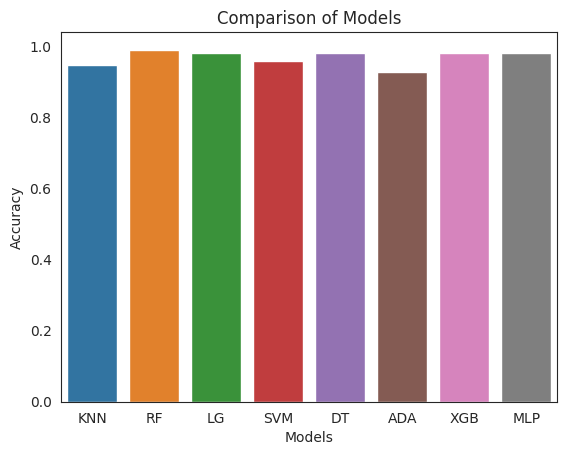

In [ ]:
plt.title("Comparison of Models")
sns.barplot(x=final_data["Models"],y=final_data["Accuracy"],data=df)

without balacing

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True,kernel='rbf',random_state=0),
    "Gaussian NB": GaussianNB(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Multilayer Perceptron": MLPClassifier()

}

# Train and evaluate machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)

    mcc = matthews_corrcoef(y_test, y_pred)
    #logloss = log_loss(y_test, model.predict_proba())

    print("Machine Learning Model: {}".format(model_name))
    print("Accuracy: {:.6f}".format(accuracy))
    print("Macro-Avg Precision: {:.6f}".format(precision))
    print("Macro-Avg Recall: {:.6f}".format(recall))
    print("Macro-Avg F1-Score: {:.6f}".format(f1))
    print("AUC: {:.6f}".format(auc))  # Print AUC
    print("Matthews Correlation Coefficient (MCC): {:.6f}".format(mcc))
    #print("Log Loss: {:.6f}".format(logloss))

    print()

Machine Learning Model: Logistic Regression
Accuracy: 0.958333
Macro-Avg Precision: 0.959477
Macro-Avg Recall: 0.957881
Macro-Avg F1-Score: 0.958261
AUC: 0.988276
Matthews Correlation Coefficient (MCC): 0.917357

Machine Learning Model: Decision Tree
Accuracy: 0.968750
Macro-Avg Precision: 0.969130
Macro-Avg Recall: 0.968519
Macro-Avg F1-Score: 0.968719
AUC: 0.968519
Matthews Correlation Coefficient (MCC): 0.937650

Machine Learning Model: Random Forest
Accuracy: 0.989583
Macro-Avg Precision: 0.990000
Macro-Avg Recall: 0.989362
Macro-Avg F1-Score: 0.989573
AUC: 1.000000
Matthews Correlation Coefficient (MCC): 0.979361

Machine Learning Model: SVC
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.959114

Machine Learning Model: Gaussian NB
Accuracy: 0.906250
Macro-Avg Precision: 0.906250
Macro-Avg Recall: 0.906426
Macro-Avg F1-Score: 0.906240
AUC: 0.977855
Matthews Correlation 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Balancing

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True,kernel='rbf',random_state=0),
    "Gaussian NB": GaussianNB(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Multilayer Perceptron": MLPClassifier()

}

# Train and evaluate machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)

    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, model.predict_proba(X_val))

    print("Machine Learning Model: {}".format(model_name))
    print("Accuracy: {:.6f}".format(accuracy))
    print("Macro-Avg Precision: {:.6f}".format(precision))
    print("Macro-Avg Recall: {:.6f}".format(recall))
    print("Macro-Avg F1-Score: {:.6f}".format(f1))
    print("AUC: {:.6f}".format(auc))  # Print AUC
    print("Matthews Correlation Coefficient (MCC): {:.6f}".format(mcc))
    print("Log Loss: {:.6f}".format(logloss))

    print()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Machine Learning Model: Logistic Regression
Accuracy: 0.958333
Macro-Avg Precision: 0.959477
Macro-Avg Recall: 0.957881
Macro-Avg F1-Score: 0.958261
AUC: 0.988276
Matthews Correlation Coefficient (MCC): 0.917357
Log Loss: 10.706008

Machine Learning Model: Decision Tree
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.978723
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 19.523646

Machine Learning Model: Random Forest
Accuracy: 0.989583
Macro-Avg Precision: 0.990000
Macro-Avg Recall: 0.989362
Macro-Avg F1-Score: 0.989573
AUC: 0.999566
Matthews Correlation Coefficient (MCC): 0.979361
Log Loss: 1.174078



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Machine Learning Model: SVC
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 1.885401

Machine Learning Model: Gaussian NB
Accuracy: 0.906250
Macro-Avg Precision: 0.906250
Macro-Avg Recall: 0.906426
Macro-Avg F1-Score: 0.906240
AUC: 0.977855
Matthews Correlation Coefficient (MCC): 0.812676
Log Loss: 17.462724

Machine Learning Model: KNeighbors Classifier
Accuracy: 0.937500
Macro-Avg Precision: 0.945455
Macro-Avg Recall: 0.936170
Macro-Avg F1-Score: 0.937063
AUC: 0.985671
Matthews Correlation Coefficient (MCC): 0.881576
Log Loss: 0.801570



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Machine Learning Model: AdaBoost Classifier
Accuracy: 0.927083
Macro-Avg Precision: 0.927391
Macro-Avg Recall: 0.926835
Macro-Avg F1-Score: 0.927012
AUC: 0.954407
Matthews Correlation Coefficient (MCC): 0.854226
Log Loss: 0.753206

Machine Learning Model: GradientBoostingClassifier
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.998697
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 2.035923

Machine Learning Model: XGBoost
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 2.063978

Machine Learning Model: Multilayer Perceptron
Accuracy: 0.968750
Macro-Avg Precision: 0.969130
Macro-Avg Recall: 0.968519
Macro-Avg F1-Score: 0.968719
AUC: 0.998263
Matthews Correlation Coefficient (MCC): 0.937650
Log Loss: 9.664538



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Machine Learning Model: Logistic Regression
Accuracy: 0.958333
Macro-Avg Precision: 0.959477
Macro-Avg Recall: 0.957881
Macro-Avg F1-Score: 0.958261
AUC: 0.988276
Matthews Correlation Coefficient (MCC): 0.917357
Log Loss: 10.706008

Confusion Matrix:
[[48  1]
 [ 3 44]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


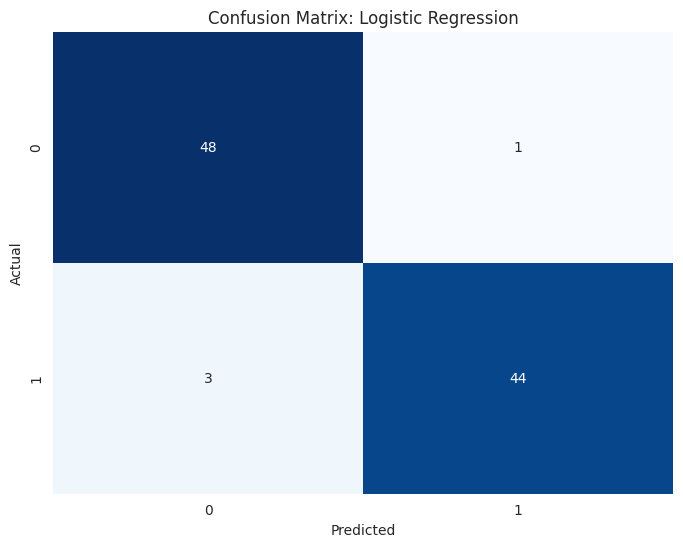

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Machine Learning Model: Decision Tree
Accuracy: 0.968750
Macro-Avg Precision: 0.969130
Macro-Avg Recall: 0.968519
Macro-Avg F1-Score: 0.968719
AUC: 0.968519
Matthews Correlation Coefficient (MCC): 0.937650
Log Loss: 19.148191

Confusion Matrix:
[[48  1]
 [ 2 45]]


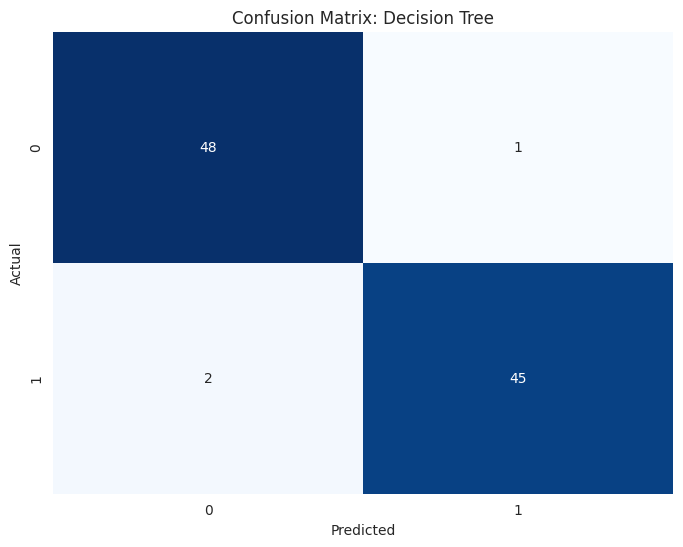


Machine Learning Model: Random Forest
Accuracy: 0.989583
Macro-Avg Precision: 0.990000
Macro-Avg Recall: 0.989362
Macro-Avg F1-Score: 0.989573
AUC: 0.999566
Matthews Correlation Coefficient (MCC): 0.979361
Log Loss: 1.757798

Confusion Matrix:
[[49  0]
 [ 1 46]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


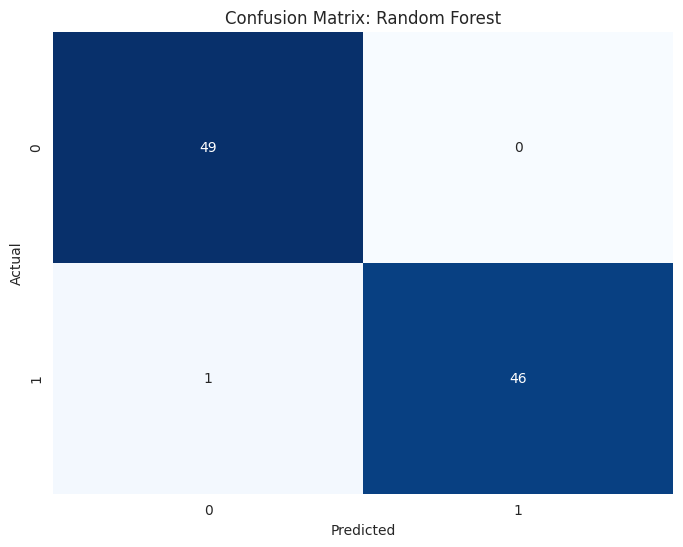

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



Machine Learning Model: SVC
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 1.885401

Confusion Matrix:
[[49  0]
 [ 2 45]]


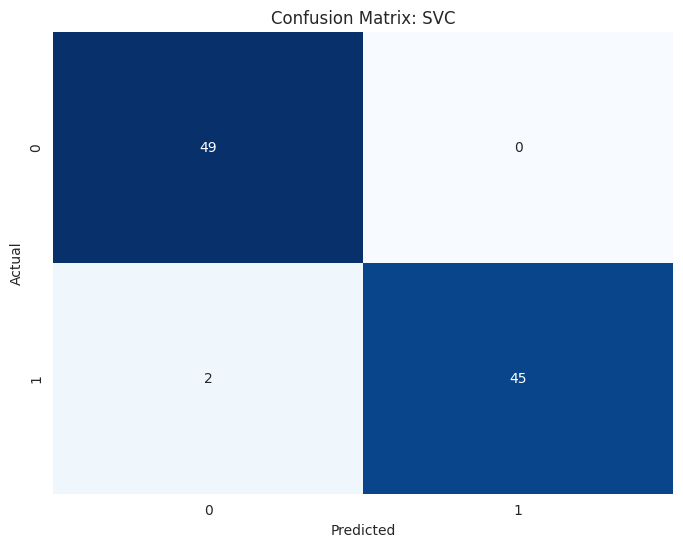


Machine Learning Model: Gaussian NB
Accuracy: 0.906250
Macro-Avg Precision: 0.906250
Macro-Avg Recall: 0.906426
Macro-Avg F1-Score: 0.906240
AUC: 0.977855
Matthews Correlation Coefficient (MCC): 0.812676
Log Loss: 17.462724

Confusion Matrix:
[[44  5]
 [ 4 43]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


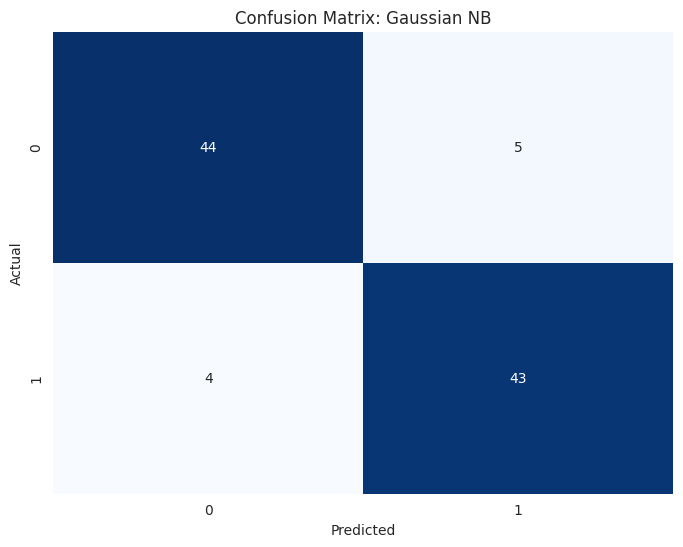


Machine Learning Model: KNeighbors Classifier
Accuracy: 0.937500
Macro-Avg Precision: 0.945455
Macro-Avg Recall: 0.936170
Macro-Avg F1-Score: 0.937063
AUC: 0.985671
Matthews Correlation Coefficient (MCC): 0.881576
Log Loss: 0.801570

Confusion Matrix:
[[49  0]
 [ 6 41]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


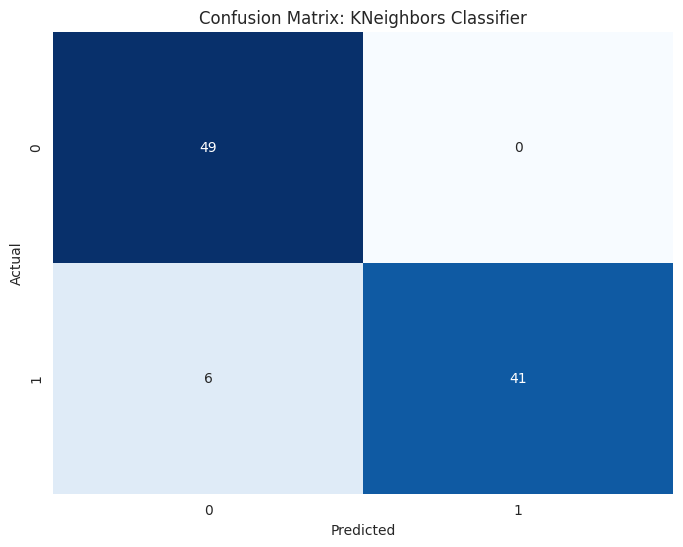

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Machine Learning Model: AdaBoost Classifier
Accuracy: 0.927083
Macro-Avg Precision: 0.927391
Macro-Avg Recall: 0.926835
Macro-Avg F1-Score: 0.927012
AUC: 0.954407
Matthews Correlation Coefficient (MCC): 0.854226
Log Loss: 0.753206

Confusion Matrix:
[[46  3]
 [ 4 43]]


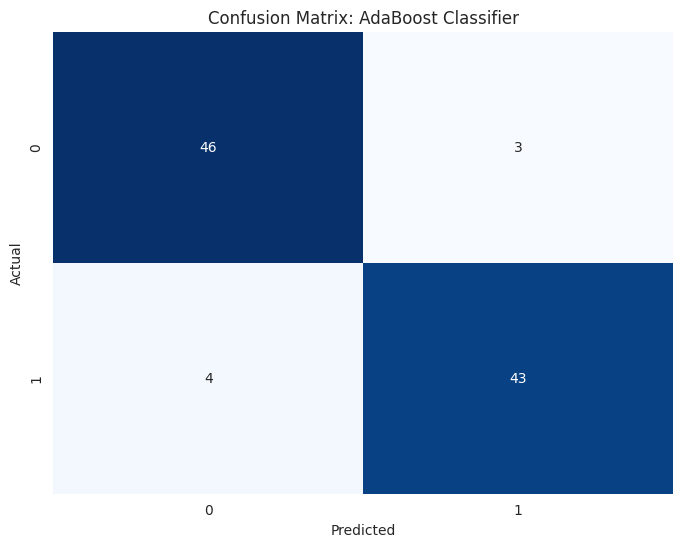


Machine Learning Model: GradientBoostingClassifier
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.998697
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 2.038706

Confusion Matrix:
[[49  0]
 [ 2 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


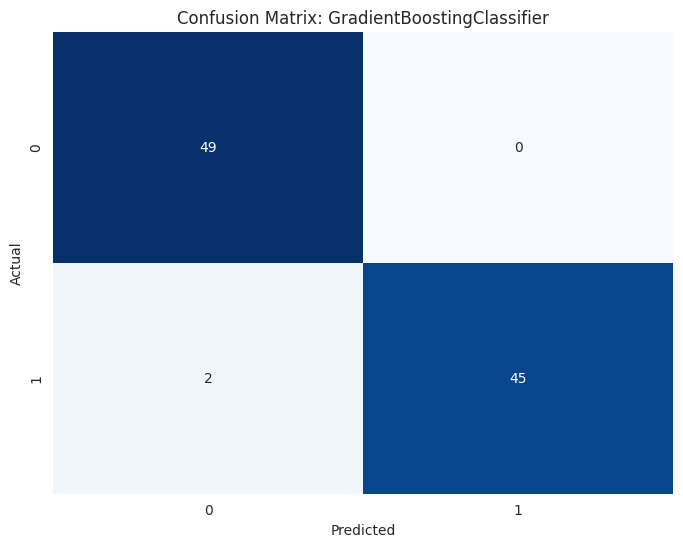


Machine Learning Model: XGBoost
Accuracy: 0.979167
Macro-Avg Precision: 0.980392
Macro-Avg Recall: 0.978723
Macro-Avg F1-Score: 0.979130
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.959114
Log Loss: 2.063978

Confusion Matrix:
[[49  0]
 [ 2 45]]


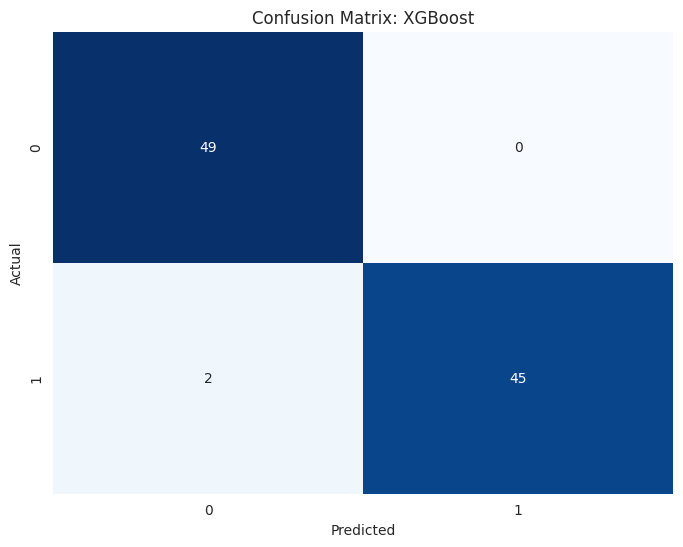


Machine Learning Model: Multilayer Perceptron
Accuracy: 0.968750
Macro-Avg Precision: 0.969130
Macro-Avg Recall: 0.968519
Macro-Avg F1-Score: 0.968719
AUC: 0.999132
Matthews Correlation Coefficient (MCC): 0.937650
Log Loss: 12.331273

Confusion Matrix:
[[48  1]
 [ 2 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


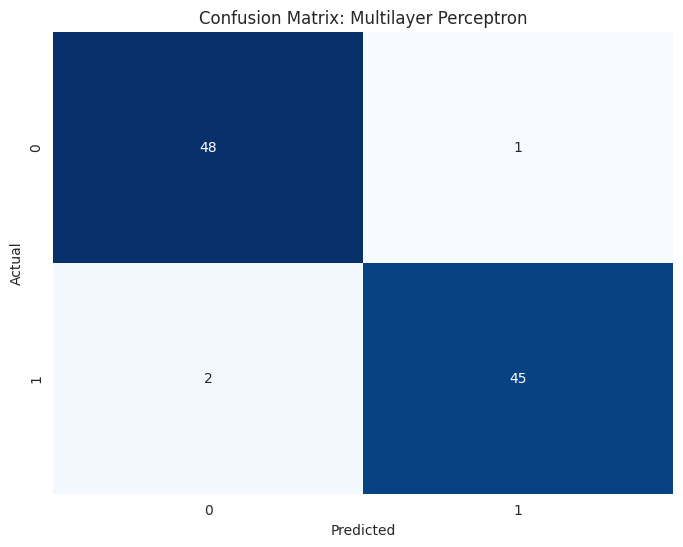

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True,kernel='rbf',random_state=0),
    "Gaussian NB": GaussianNB(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Multilayer Perceptron": MLPClassifier()

}

# Train and evaluate machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)

    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, model.predict_proba(X_val))

    print("Machine Learning Model: {}".format(model_name))
    print("Accuracy: {:.6f}".format(accuracy))
    print("Macro-Avg Precision: {:.6f}".format(precision))
    print("Macro-Avg Recall: {:.6f}".format(recall))
    print("Macro-Avg F1-Score: {:.6f}".format(f1))
    print("AUC: {:.6f}".format(auc))  # Print AUC
    print("Matthews Correlation Coefficient (MCC): {:.6f}".format(mcc))
    print("Log Loss: {:.6f}".format(logloss))
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualize confusion matrix
    classes = np.unique(y_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix: {}'.format(model_name))
    plt.show()
    print()

Hypermodeling

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
        'lG' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(probability=True),
        'params' : {
            'C': [1,10,20,50],
            'kernel': ['rbf','linear','poly']
        }
    },

    'dT': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'splitter' : ['best','random']


        }
    },
    'RF': {
        'model': RandomForestClassifier(n_estimators=100),
        'params' : {

        }
    },

         'KNN': {
        'model':  KNeighborsClassifier(),
        'params' : {
         'n_neighbors': [3, 5, 7]
        }
    },




       'AD' : {
        'model' :AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]
        }
    },





        'XB' : {
        'model' : xgb.XGBClassifier(),
        'params': {
         'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 4, 5]
        }
        },

    'MP' : {
        'model' : MLPClassifier(),
        'params': {}
        }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

model  best_score                                        best_params
0    lG    0.924120                                           {'C': 1}
1   svm    0.979975                         {'C': 50, 'kernel': 'rbf'}
2    dT    0.979900        {'criterion': 'gini', 'splitter': 'random'}
3    RF    0.982172                                                 {}
4   KNN    0.933059                                 {'n_neighbors': 3}
5    AD    0.930886          {'learning_rate': 1, 'n_estimators': 200}
6    XB    0.982147  {'learning_rate': 1, 'max_depth': 5, 'n_estima...
7    MP    0.962047                                                 {}

<Axes: xlabel='model', ylabel='best_score'>

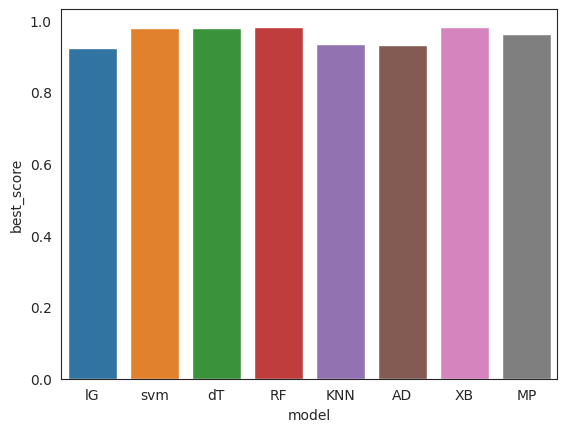

In [ ]:
sns.barplot(x=df["model"],y=df["best_score"],data=df)

In [ ]:
!pip install optuna

K fold

In [ ]:
from sklearn.model_selection import cross_val_score


k1 = cross_val_score(KNeighborsClassifier(n_neighbors=3),X1,y,cv=5,scoring='precision').mean()
k2 = cross_val_score(KNeighborsClassifier(n_neighbors=3),X1,y,cv=5,scoring='recall').mean()
k3 = cross_val_score(KNeighborsClassifier(n_neighbors=3),X1,y,cv=5,scoring='f1_macro').mean()
k4 = cross_val_score(KNeighborsClassifier(n_neighbors=3),X1,y,cv=5).mean()
print(k4 , k1 , k2 , k3)

0.9173076923076924 0.9612309733277474 0.903125 0.9140635439343046


In [ ]:
r1 = cross_val_score(RF,X1,y,cv=5,scoring='precision').mean()
r2 = cross_val_score(RF,X1,y,cv=5,scoring='recall').mean()
r3 = cross_val_score(RF,X1,y,cv=5,scoring='f1_macro').mean()
r4 = cross_val_score(RF,X1,y,cv=5).mean()
print(r4 , r1 , r2 , r3)

0.973076923076923 0.9794340924775706 0.98125 0.969273620318595


In [ ]:
s1 = cross_val_score(SVC(probability=True,kernel='rbf',C=50),X1,y,cv=5,scoring='precision').mean()
s2 = cross_val_score(SVC(probability=True,kernel='rbf',C=50),X1,y,cv=5,scoring='recall').mean()
s3 = cross_val_score(SVC(probability=True,kernel='rbf',C=50),X1,y,cv=5,scoring='f1_macro').mean()
s4 = cross_val_score(SVC(probability=True,kernel='rbf',C=50),X1,y,cv=5).mean()
print(s4 , s1 , s2 , s3)

0.9076923076923077 0.9601373136230407 0.8875 0.9044464385928723


In [ ]:
l1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X1,y,cv=5,scoring='precision').mean()
l2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X1,y,cv=5,scoring='recall').mean()
l3 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X1,y,cv=5,scoring='f1_macro').mean()
l4 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X1,y,cv=5).mean()
print(l4 , l1 , l2 , l3)

0.926923076923077 0.9510113520369495 0.93125 0.9229315192566545


In [ ]:
d1 = cross_val_score(DC,X1,y,cv=5,scoring='precision').mean()
d2 = cross_val_score(DC,X1,y,cv=5,scoring='recall').mean()
d3 = cross_val_score(DC,X1,y,cv=5,scoring='f1_macro').mean()
d4 = cross_val_score(DC,X1,y,cv=5).mean()
print(d4 , d1 , d2 , d3)

0.9615384615384615 0.9697522085757381 0.965625 0.9591818479270333


In [ ]:
ad1 = cross_val_score(ada,X1,y,cv=5,scoring='precision').mean()
ad2 = cross_val_score(ada,X1,y,cv=5,scoring='recall').mean()
ad3 = cross_val_score(ada,X1,y,cv=5,scoring='f1_macro').mean()
ad4 = cross_val_score(ada,X1,y,cv=5).mean()
print(ad4 , ad1 , ad2 , ad3)

0.9211538461538462 0.939460448427097 0.934375 0.9163097317901489


In [ ]:
xb1 = cross_val_score(xb,X1,y,cv=5,scoring='precision').mean()
xb2 = cross_val_score(xb,X1,y,cv=5,scoring='recall').mean()
xb3 = cross_val_score(xb,X1,y,cv=5,scoring='f1_macro').mean()
xb4 = cross_val_score(xb,X1,y,cv=5).mean()
print(xb4 , xb1 , xb2 , xb3)

0.9673076923076923 0.9757403458895997 0.971875 0.965283316470283


In [ ]:
mu1 = cross_val_score(mu,X1,y,cv=5,scoring='precision').mean()
mu2 = cross_val_score(mu,X1,y,cv=5,scoring='recall').mean()
mu3 = cross_val_score(mu,X1,y,cv=5,scoring='f1_macro').mean()
mu4 = cross_val_score(mu,X1,y,cv=5).mean()
print(mu4 , mu1 , mu2 , mu3)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

0.9173076923076924 0.9499100859493368 0.909375 0.9109361831986016


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ensamble

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_m = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

bag_m.fit(X_train,y_train)
y_pr1 = bag_m.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pr1))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



In [ ]:
oob_scores = []
# Define the models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True,kernel='rbf',C=50),
    "Gaussian NB": GaussianNB(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Multilayer Perceptron": MLPClassifier()
}

# Initialize a dictionary to store Bagging models
bagged_models = {}

# Apply Bagging to each model
for name, model in models.items():
    bag_m = BaggingClassifier(
        base_estimator=model,
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=0
    )


    bag_m.fit(X_train, y_train)
    y_pr = bag_m.predict(X_test)
    oob_scores.append(bag_m.oob_score_)

    bagged_models[name] = bag_m
    print(f"Classification Report for {name}:")
    print(classification_report(y_true=y_test, y_pred=y_pr))
    average_oob_score = sum(oob_scores) / len(oob_scores)

    print(f"Average Out-of-Bag Score: {average_oob_score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.98      0.94      0.96        47

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

Average Out-of-Bag Score: 0.9353


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96

Average Out-of-Bag Score: 0.9554


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        47

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96

Average Out-of-Bag Score: 0.9598


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96

Average Out-of-Bag Score: 0.9660


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Gaussian NB:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        49
           1       0.90      0.91      0.91        47

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.91      0.91      0.91        96

Average Out-of-Bag Score: 0.9487


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.94      0.97        47

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Average Out-of-Bag Score: 0.9457


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.93      0.91      0.92        47

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96

Average Out-of-Bag Score: 0.9445


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        47

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96

Average Out-of-Bag Score: 0.9478


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.96      0.97        47

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Average Out-of-Bag Score: 0.9499


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochasti

Classification Report for Multilayer Perceptron:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.98      0.91      0.95        47

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96

Average Out-of-Bag Score: 0.9511


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


AUC Scores:
Logistic Regression (Class 0): 0.9878
Logistic Regression (Class 1): 0.9878
Decision Tree (Class 0): 0.9787
Decision Tree (Class 1): 0.9787
Random Forest (Class 0): 1.0000
Random Forest (Class 1): 1.0000
SVC (Class 0): 0.9965
SVC (Class 1): 0.9965
Gaussian NB (Class 0): 0.9779
Gaussian NB (Class 1): 0.9779
KNeighbors Classifier (Class 0): 0.9766
KNeighbors Classifier (Class 1): 0.9766
AdaBoost Classifier (Class 0): 0.9544
AdaBoost Classifier (Class 1): 0.9544
GradientBoostingClassifier (Class 0): 0.9987
GradientBoostingClassifier (Class 1): 0.9987
XGBoost (Class 0): 0.9991
XGBoost (Class 1): 0.9991
Multilayer Perceptron (Class 0): 0.9983
Multilayer Perceptron (Class 1): 0.9983


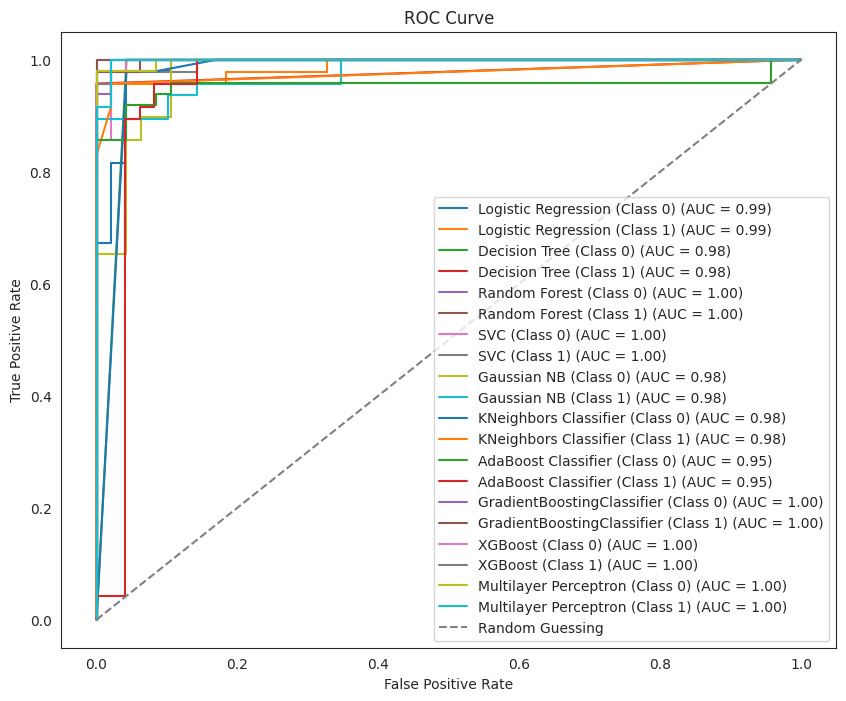

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(probability=True,kernel='rbf',C=50),
    "Gaussian NB": GaussianNB(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Multilayer Perceptron": MLPClassifier()
}

# Initialize lists to store AUC scores and ROC curves
auc_scores = {}
roc_curves = {}

# Train and evaluate machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate AUC score for each class
    for i in range(len(model.classes_)):
        auc = roc_auc_score(y_test == model.classes_[i], y_pred_proba[:, i])
        auc_scores[f"{model_name} (Class {model.classes_[i]})"] = auc

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_pred_proba[:, i])
        roc_curves[f"{model_name} (Class {model.classes_[i]})"] = (fpr, tpr)

# Print AUC scores
print("AUC Scores:")
for model_name, auc in auc_scores.items():
    print(f"{model_name}: {auc:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_scores[model_name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average AUC Scores:
Logistic Regression: 0.9878
Decision Tree: 0.9787
Random Forest: 1.0000
SVC: 0.9965
Gaussian NB: 0.9779
KNeighbors Classifier: 0.9766
AdaBoost Classifier: 0.9544
GradientBoostingClassifier: 0.9987
XGBoost: 0.9991
Multilayer Perceptron: 0.9991


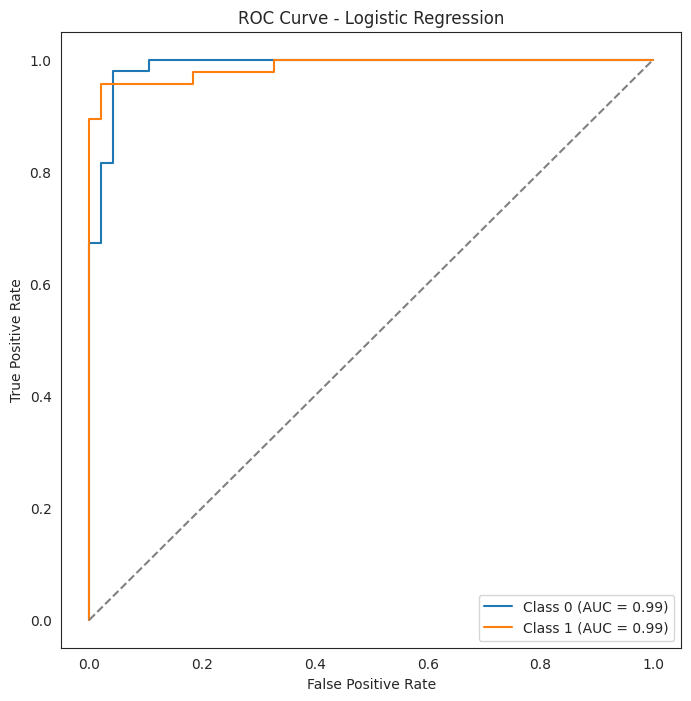

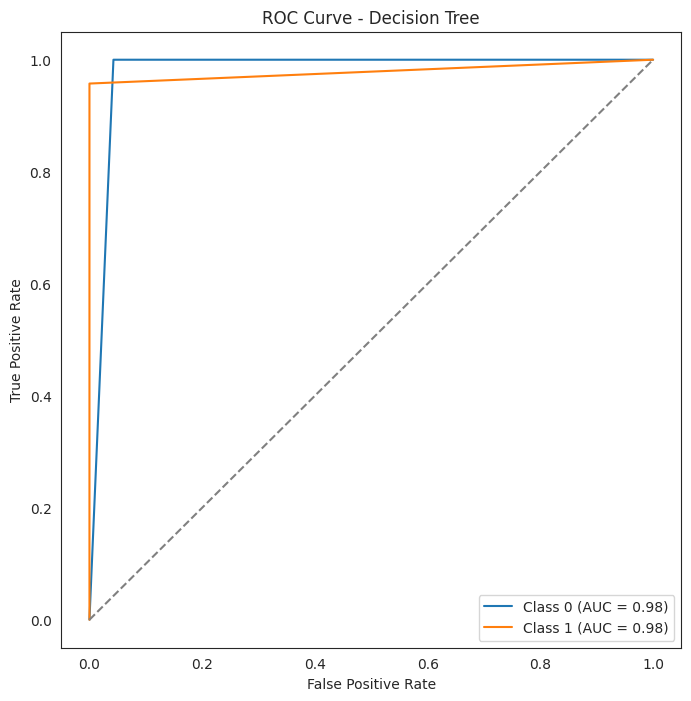

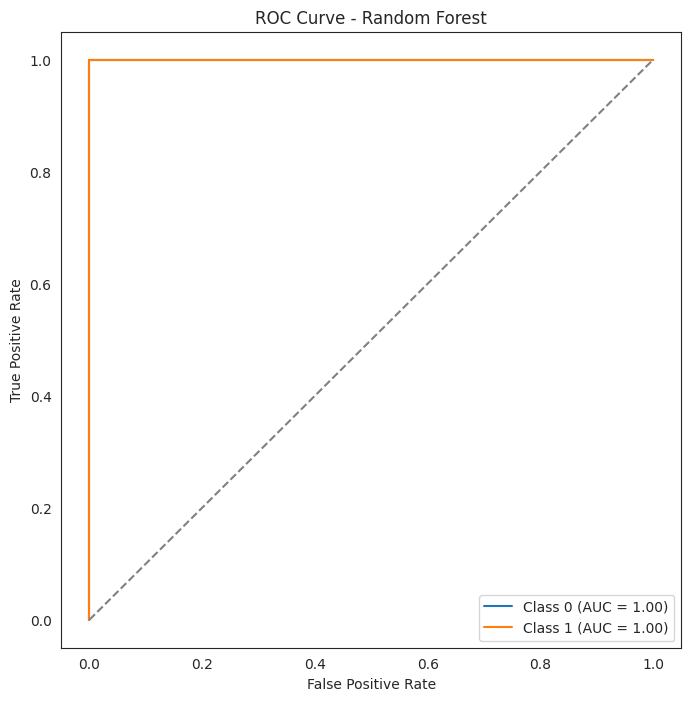

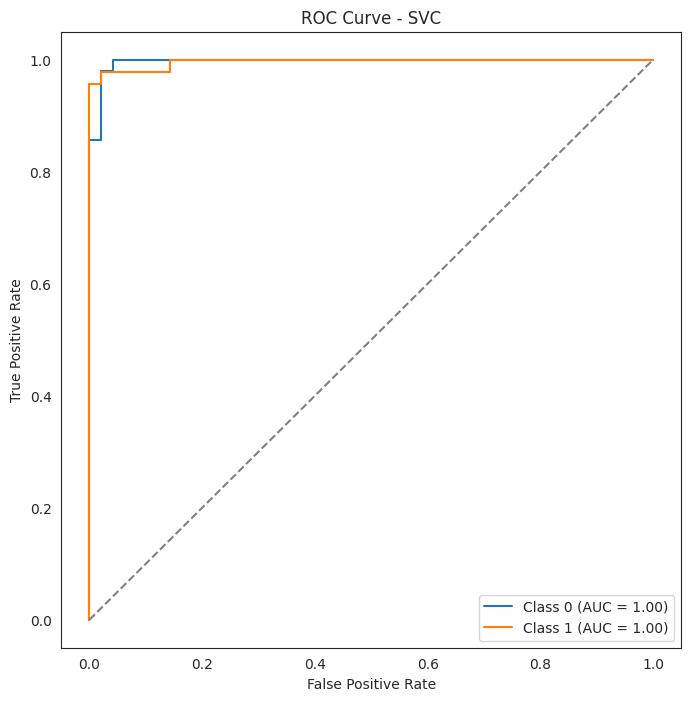

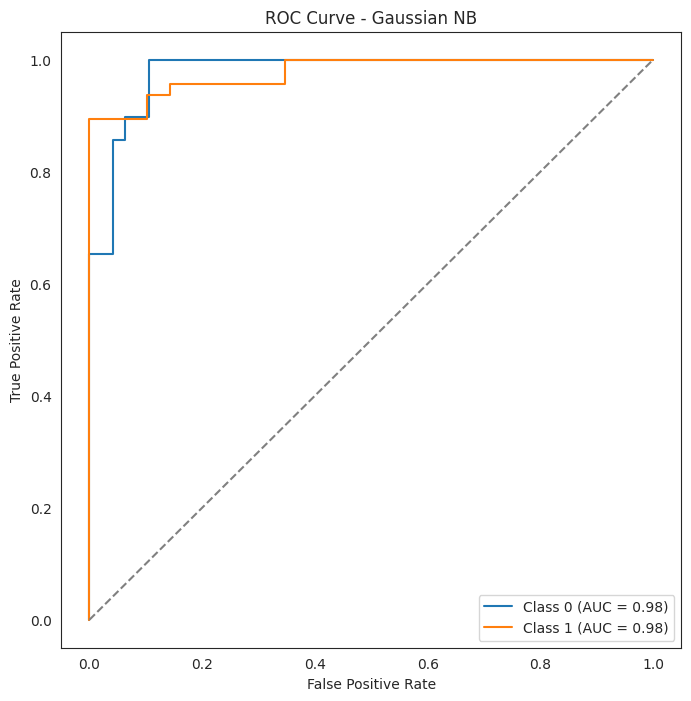

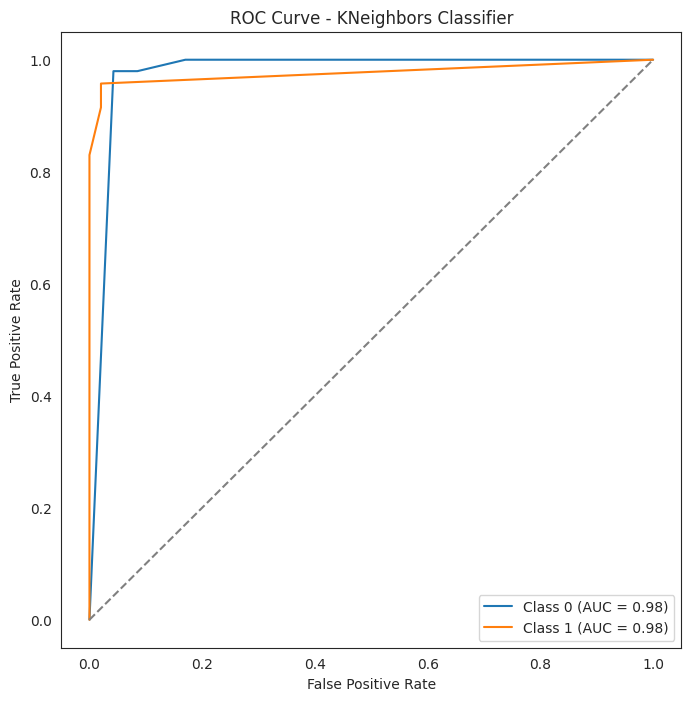

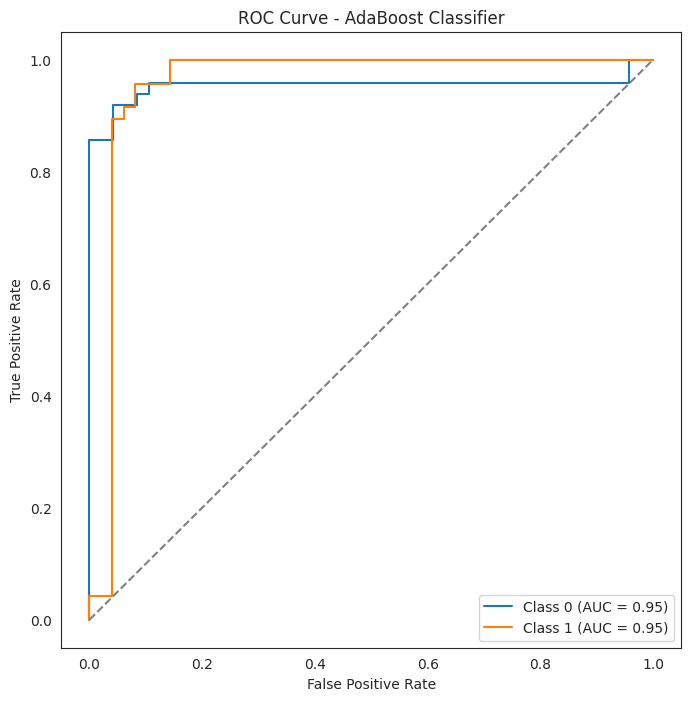

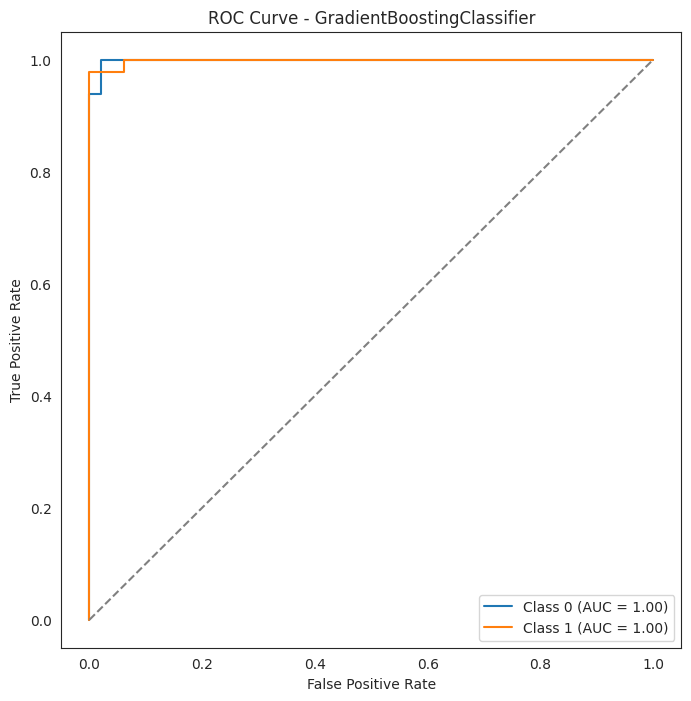

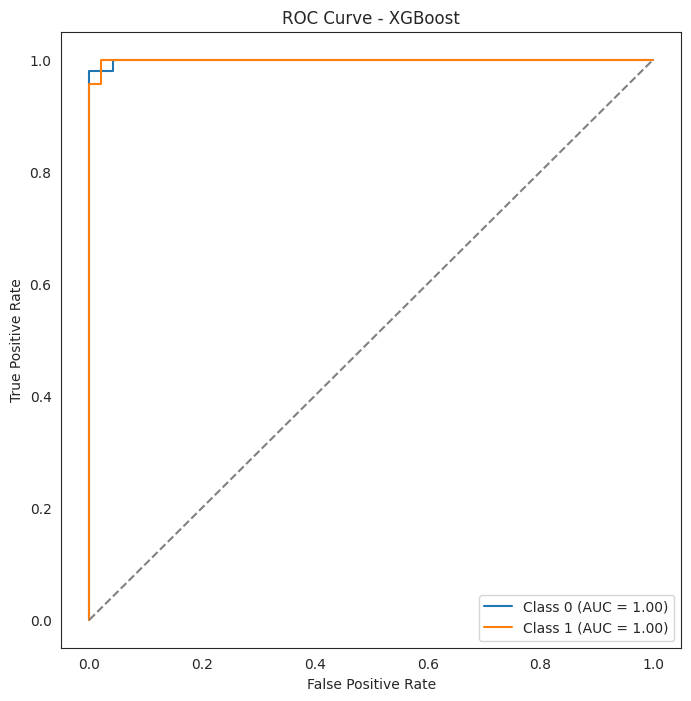

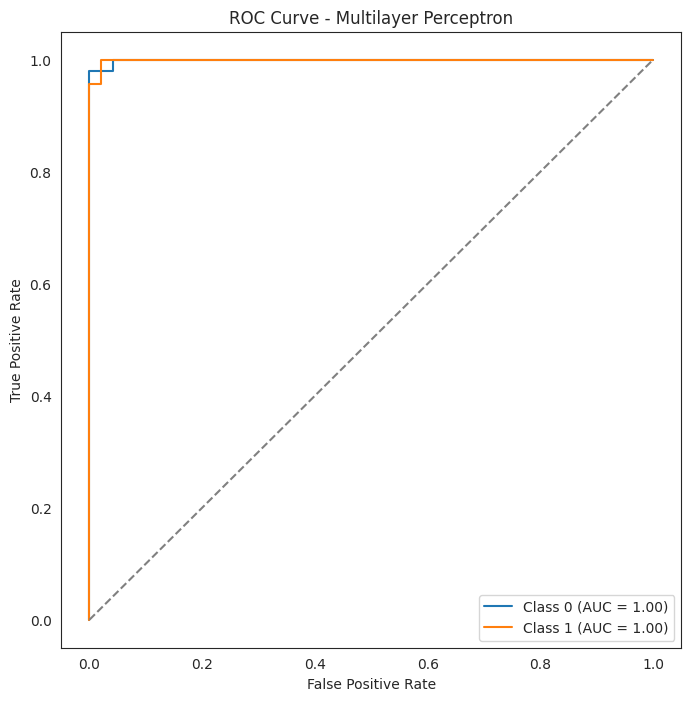

In [ ]:
from sklearn.metrics import roc_curve, auc

average_auc_scores = {}

# Train and evaluate machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)

    # Initialize a dictionary to store AUC scores for each class
    auc_scores = {}

    # Calculate AUC score for each class
    for i in range(len(model.classes_)):
        y_true_class = (y_test == model.classes_[i])
        y_pred_class_proba = y_pred_proba[:, i]

        fpr, tpr, _ = roc_curve(y_true_class, y_pred_class_proba)
        roc_auc = auc(fpr, tpr)
        auc_scores[model.classes_[i]] = roc_auc

    # Calculate average AUC score for the model
    average_auc = np.mean(list(auc_scores.values()))

    # Store the average AUC score in the dictionary
    average_auc_scores[model_name] = average_auc

    # Plot ROC curves
    plt.figure(figsize=(8, 8))
    for class_label, roc_auc in auc_scores.items():
        fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, class_label])
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()

# Print average AUC scores for each model
print("Average AUC Scores:")
for model_name, auc in average_auc_scores.items():
    print(f"{model_name}: {auc:.4f}")

# Show all ROC curves
plt.show()


In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
Dt = DecisionTreeClassifier()
svc = SVC(probability=True,kernel='rbf',C=50)
rf = RandomForestClassifier(n_estimators=100)
Gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=3)
AdC = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
mlp = MLPClassifier()
Xgb = xgb.XGBClassifier()

meta_model = LogisticRegression(solver='liblinear',multi_class='ovr')

# Define the stacking classifier
stacking_classifier = StackingCVClassifier(
    classifiers=[lr, Dt, svc, rf, Gnb, KNN, AdC, gbc, mlp, Xgb],
    meta_classifier=meta_model,
    use_probas=True,
    random_state=42
)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_val_pred = stacking_classifier.predict(X_val)

# Calculate the accuracy
stacking_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Stacking Classifier accuracy: {stacking_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Classifier accuracy: 0.4896


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/

In [ ]:
def create_nn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_bal.shape[1])

# Train
nn_history = nn_model.fit(
    X_bal, y_bal, validation_data=(X_val, y_val),
    epochs=100, batch_size=32, verbose=0
)

# Evaluate
nn_accuracy = nn_history.history['val_accuracy'][-1]
print(f"Neural Network accuracy: {nn_accuracy:.4f}")

Neural Network accuracy: 0.9792


In [ ]:
from sklearn.ensemble import VotingClassifier
est = []
est.append(('svc',svc))
est.append(('RF',rf))
est.append(('xgb',Xgb))

In [ ]:
from sklearn.ensemble import VotingClassifier
est = []
est.append(('dt',Dt))
est.append(('RF',rf))
est.append(('xgb',Xgb))

In [ ]:
from sklearn.ensemble import VotingClassifier
est = []
est.append(('lr',lr))
est.append(('KNN',KNN))
est.append(('dtc',Dt))



In [ ]:
vot_soft = VotingClassifier(estimators=est,voting='soft')
vot_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
vot_soft.score(X_test,y_test)

0.9791666666666666

In [ ]:
vot_hard = VotingClassifier(estimators=est,voting='hard')
vot_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('dtc', DecisionTreeClassifier())])

In [ ]:
vot_soft.score(X_test,y_test)

0.9791666666666666

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
yp=vot_soft.predict(X_test)
yp1=vot_hard.predict(X_test)

In [ ]:
mean_squared_error(y_test,yp)

0.020833333333333332

In [ ]:
mean_squared_error(y_test,yp1)

0.03125

In [ ]:

!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.0 MB/s eta 0:00:00


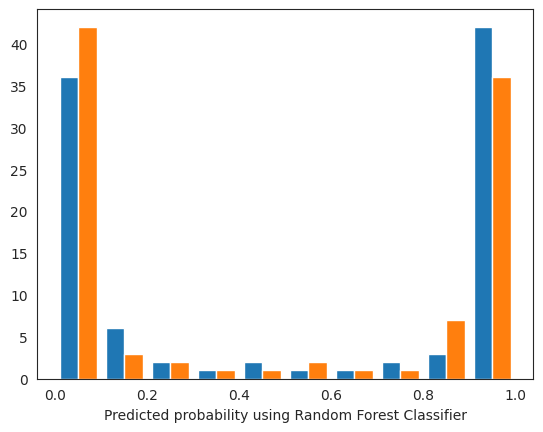

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
out = rfc.predict_proba(X_test)
plt.hist(out)
plt.xlabel('Predicted probability using Random Forest Classifier')
plt.show()

In [ ]:
!pip install lime

In [ ]:
!pip install shap

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

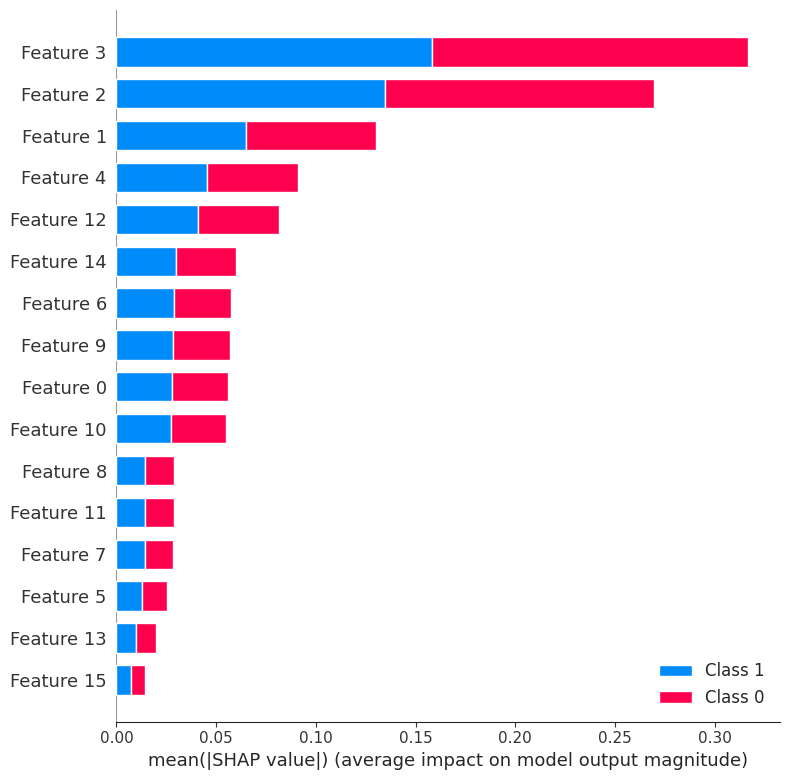

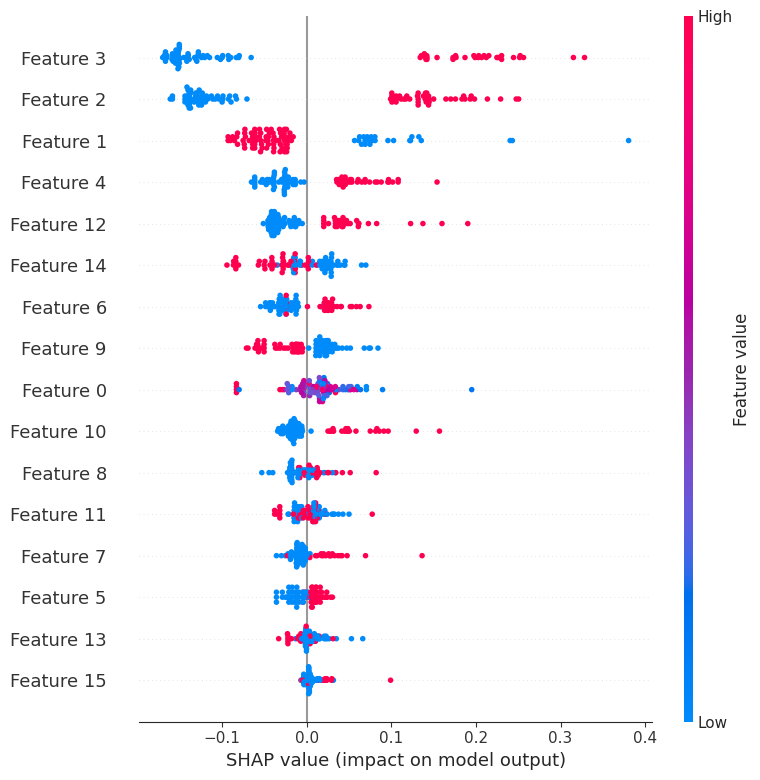

In [ ]:
import shap
# Initialize the SHAP explainer
shap_explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the entire test dataset
shap_values = shap_explainer.shap_values(X_test)

# Create summary plots
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values[1], X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred1=rfc.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        47

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

# Create and fit the model
regression_model = HuberRegressor()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
#msle = mean_squared_log_error(y_test, y_pred)
print(mae)
print(mse)

0.3657714508562493
0.16907995180783908


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
X has feature names, but HuberRegressor was fitted without feature names


In [ ]:
# importing lime
import lime
from lime import lime_tabular

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

AttributeError: ignored

In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer
# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

AttributeError: ignored

In [ ]:
# obtaining the explanation

explanation = explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=model.predict_proba, top_labels=6, num_features=12)



AttributeError: ignored

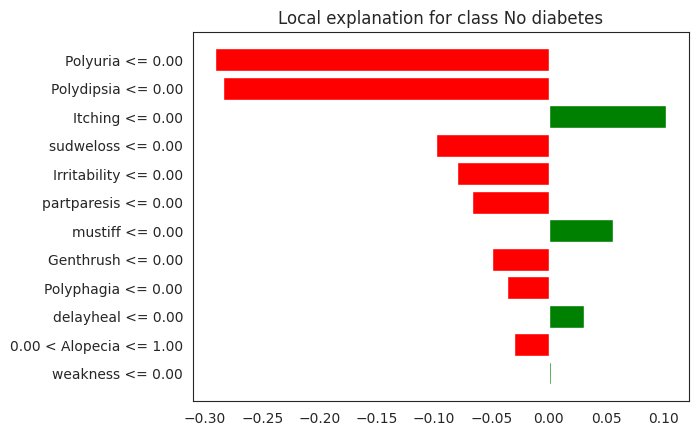

In [ ]:
fig = explanation.as_pyplot_figure()